#SES 2024 GNN Implementation

Experiment Agenda:

1.   Read Pycfg data (Done)
2.   Create Edge-List and Node-List from dot files.(Done)
3.   Create Graph instances by networkx. (Done)
4.   Calculate Centraly (Done)
5.   Calculate Community (Skip)
6.   Calculate Graph Basic feature like degree, etc... (Skip)
7.   Carete DataLoad for Pytorch Geometrics (Done)
8.   Configure Hyper Parameters (Done)
9.   GAT, GGNN, GCN Execution (Done)
- Layer 3 to 6
- Hyper parameter tuning
- Feature type {basic | Centraly | Community}
10.  Graph Atention Network Execution
- Hyper parameter tuning
- Feature type {Basic | Centraly | Community}
11.  Gate Graph Neural Network
- Hyper parameter tuning
- Feature tupe {Basic | Centraly | Community}








In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jun  8 11:25:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#0.Library

In [2]:
!pip install pandas

In [3]:
!pip install scipy

In [4]:
!pip install openpyxl
!pip install torch-geometric
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 15.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

##Functions

In [5]:
# None Check
# Argument : argument
# return : If argument is None, raise ValueError with 'Argument is None' message.
def none_check(argument : any):
  if argument is None or encoding is None:
    raise ValueError("Argument is None.")

In [6]:
# Read dot file and retrn text.
# Argument : String file_path, String encoding
# Return : String dotFile
def readFile(file_path : str, encoding : str):
    if file_path is None or encoding is None:
      raise ValueError("Argument is None.")
    try:
        print
        with open(file_path, 'r', encoding=encoding) as file:
            dot_file = file.read()
            # #Chech
            # print('dotFile {}'.format(dot_file))
        return dot_file
    except FileNotFoundError:
        return "Not found any files."


In [7]:
import re
import warnings

# Read Dot file. Then, read each line. When the line is started from numerical char and does not have -> char, put numerical as key and other description is value into the dictonary.
# Argument : String filePath, String encording
# Return : result{}, key=NodeNumber and value='Other description'
def create_nodeList_from_dotFile(filePath : str, encording : str):
  # return variable
  result = {} # Initialize result dictionary
  with open(filePath, 'r', encoding='utf-8') as file:
    for line in file:
      line = line.strip()
      # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
      match = re.match(r'^(\d+)\s+(.*)', line)
      if match and '->' not in line:
        key = match.group(1)
        value = match.group(2)
        result[key] = value
    return result

# Read Dot file. Then, read each line. When the line is started from numerical char and have -> char, put this line into edgeList array.
# Argument : String filePath, String encording
# Return : result[], statNode Number -> endNode Number.
# def create_edgeList_from_dotFile(dot_file_txt : str, encording : str):
def create_edgeList_from_dotFile(filePath : str, encording : str):
  # return variable
  result = []
  with open(filePath, 'r', encoding='utf-8') as file:
    for line in file:
      line = line.strip()
      # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
      match = re.match(r'^(\d+)\s+(.*)', line)
      if match and '->' in line:
        result.append(line)
    return result

In [8]:
import os

def count_dot_files(directory):
    """
    Count the number of '.dot' file under the designated directory.

    Args:
        directory (str): Directory Path

    Returns:
        int: The number of '.dot' file.
    """
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.dot'):
                count += 1
    return count

# execute sample
directory_path = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask'
dot_file_count = count_dot_files(directory_path)
print(f"Count .dot under flask: {dot_file_count}")

directory_path = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx'
dot_file_count = count_dot_files(directory_path)
print(f"Count .dot under networkx: {dot_file_count}")

directory_path = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric'
dot_file_count = count_dot_files(directory_path)
print(f"Count .dot under Pytorch: {dot_file_count}")


Count .dot under flask: 82
Count .dot under networkx: 667
Count .dot under Pytorch: 1240


## Unit Test Codes

In [ ]:
#Library Import
import unittest

In [ ]:
class Test_none_check(unittest.TestCase):

  def test_none_check(self):
    self.assertEqual(none_check('test text'), '')

##Do Test##
unittest.main(argv=[''], verbosity=2, exit=False)

test_readFile (__main__.TestReadfile) ... ERROR
test_none_check (__main__.Test_none_check) ... ERROR

ERROR: test_readFile (__main__.TestReadfile)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-54-3051fe2d8903>", line 4, in test_readFile
    self.assertEqual(readfile('/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/branchcov.dot', 'utf-8'), '')
  File "<ipython-input-31-d38cac338aa4>", line 10, in readfile
    return dotfFile
NameError: name 'dotfFile' is not defined

ERROR: test_none_check (__main__.Test_none_check)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-58-bcc35075db8c>", line 4, in test_none_check
    self.assertEqual(none_check('test text'), '')
  File "<ipython-input-48-f7c2e99c31bf>", line 5, in none_check
    if argument is None or encoding is None:
NameError: name 'encoding' is not defined

---------

dotFile strict digraph "" {
	node [label="\N"];
	0	[label="0: start"];
	1	[label="6: Control_Flow = ['if', 'elif', 'while', 'for']"];
	0 -> 1;
	2	[label="7: Control_Flow_Re = [re.compile(('^ *%s +(.+) *: *' % i)) for i in Control_Flow]"];
	1 -> 2;
	40	[label="57: if: (__name__ == '__main__')"];
	2 -> 40;
	3	[label="11: enter: traceit(frame, event, arg)"];
	5	[label="12: if: (event in ['call', 'return', 'line'])"];
	3 -> 5;
	4	[label="11: exit: traceit(frame, event, arg)"];
	16	[label="24: return traceit"];
	16 -> 4;
	6	[label="13: (fname, line) = (frame.f_code.co_filename, frame.f_lineno)"];
	5 -> 6;
	15	[label="23: pass"];
	5 -> 15;
	7	[label="14: myvars = {**frame.f_globals, **frame.f_locals}"];
	6 -> 7;
	8	[label="15: finfo = inspect.getframeinfo(frame)"];
	7 -> 8;
	9	[label="16: src = finfo.code_context[finfo.index]"];
	8 -> 9;
	10	[label="17: matches = (ctrl.match(src) for ctrl in Control_Flow_Re)"];
	9 -> 10;
	11	[label="18: conditional = next((m.group(1) for m in matches if m), 

In [ ]:
class TestReadfile(unittest.TestCase):

  def test_readFile(self):
    self.assertEqual(readfile('/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/branchcov.dot', 'utf-8'), '')

In [ ]:
##Do Test##
unittest.main(argv=[''], verbosity=2, exit=False)

test_readFile (__main__.TestReadfile) ... ERROR
test_none_check (__main__.Test_none_check) ... ERROR

ERROR: test_readFile (__main__.TestReadfile)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-54-3051fe2d8903>", line 4, in test_readFile
    self.assertEqual(readfile('/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/branchcov.dot', 'utf-8'), '')
  File "<ipython-input-31-d38cac338aa4>", line 10, in readfile
    return dotfFile
NameError: name 'dotfFile' is not defined

ERROR: test_none_check (__main__.Test_none_check)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-56-b79116156695>", line 4, in test_none_check
    self.assertEqual(none_check('test text'), '')
  File "<ipython-input-48-f7c2e99c31bf>", line 5, in none_check
    if argument is None or encoding is None:
NameError: name 'encoding' is not defined

---------

dotFile strict digraph "" {
	node [label="\N"];
	0	[label="0: start"];
	1	[label="6: Control_Flow = ['if', 'elif', 'while', 'for']"];
	0 -> 1;
	2	[label="7: Control_Flow_Re = [re.compile(('^ *%s +(.+) *: *' % i)) for i in Control_Flow]"];
	1 -> 2;
	40	[label="57: if: (__name__ == '__main__')"];
	2 -> 40;
	3	[label="11: enter: traceit(frame, event, arg)"];
	5	[label="12: if: (event in ['call', 'return', 'line'])"];
	3 -> 5;
	4	[label="11: exit: traceit(frame, event, arg)"];
	16	[label="24: return traceit"];
	16 -> 4;
	6	[label="13: (fname, line) = (frame.f_code.co_filename, frame.f_lineno)"];
	5 -> 6;
	15	[label="23: pass"];
	5 -> 15;
	7	[label="14: myvars = {**frame.f_globals, **frame.f_locals}"];
	6 -> 7;
	8	[label="15: finfo = inspect.getframeinfo(frame)"];
	7 -> 8;
	9	[label="16: src = finfo.code_context[finfo.index]"];
	8 -> 9;
	10	[label="17: matches = (ctrl.match(src) for ctrl in Control_Flow_Re)"];
	9 -> 10;
	11	[label="18: conditional = next((m.group(1) for m in matches if m), 

#1.Read Pycfg data



*   Dot files are created on the local machine by Pycfg library.
*   These gerated files put into GDrive directory.
*   Read dot files from GDrive.





In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import pandas as pd

# Directory to read from
#directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/pycfg_dot/branchcov.dot'
directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask'

In [11]:
#Const Variable
FLASK = 'flask'
PYTORCH_GEOMETRICS = 'pytorch_geometric'
NETWORKX = 'networkx'

In [12]:
# Check if the directory exists
if os.path.exists(directory):
    print("Directory exists. Proceeding...")
    # Read dot files recursively.
    for filename in os.listdir(directory):
        if filename.endswith('.dot'):  # Fix typo: 'endwith' -> 'endswith'
            filepath = os.path.join(directory, filename)
            print("Processing:", filepath)  # Add this line to see which files are being processed
else:
    print("Directory not found. Please check the path.")

Directory exists. Proceeding...


#2.Create Edge-List and Node-List from dot files.

####2.1.Flask Dataframe

In [13]:
import pandas as pd

#recursive pattern for Flask
directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask'

# Declear the empty Dataframe only with columns name.
columns = ['LibraryName','FileName','EdgeList','NodeList']
df_flask = pd.DataFrame(columns=columns)

# Read dot files recursively. Then, create node and edge list for each file.
# Finaly, each Dot file's node & edge list are stored into one dataframe.
for root, dirs, files in os.walk(directory):
  for filename in files:
    if filename.endswith('.dot'):
      i = 0
      # #check
      # print('exist dot file in {}.'.format(directory))

      # check
      # print(dirs)

      # #Create filepath as directory + filename.
      # filePath = os.path.join(directory, filename)
      filePath = os.path.join(root, filename)

      # #check
      # print('File Path : {}'.format(filePath))

      # #Read dot file by readFile function.
      # dot_file_txt = readFile(filePath, 'utf-8')

      # #check
      # print('dot file text : \n{}'.format(dot_file_txt))

      #Exchange dot to edgeList for networkx.
      #edgeList = create_edgeList_from_dotFile(filePath, 'utf-8')

      # return variable
      result = []
      with open(filePath, 'r', encoding='utf-8') as file:
        for line in file:
          line = line.strip()
          # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
          match = re.match(r'^(\d+)\s+(.*)', line)
          if match and '->' in line:
            result.append(line)

      edgeList = result

      # #check
      # print('EdgeList {}'.format(edgeList))

      # #Exchange dot to nodeList
      # nodeList = create_nodeList_from_dotFile(dot_file_txt, 'utf-8')

      # return variable
      result = {} # Initialize result dictionary
      with open(filePath, 'r', encoding='utf-8') as file:
        for line in file:
          line = line.strip()
          # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
          match = re.match(r'^(\d+)\s+(.*)', line)
          if match and '->' not in line:
            key = match.group(1)
            value = match.group(2)
            result[key] = value
      nodeList = result

      # #check
      # print('nodeList : \n {}'.format(nodeList))

      # Insert NodeList and EdgeList into Dataframe.
      row = [ {'LibraryName': FLASK, 'FileName': filename, 'EdgeList': edgeList,'NodeList': nodeList} ]
      df_flask = pd.concat([df_flask, pd.DataFrame(row)], ignore_index=True) # Use pd.concat instead of append

# # check
# print(df_flask.info)
# # print(df_flask.columns)
# print(df_flask.index)
# print('Length {}'.format(len(df_flask)))
# # print(df_flask.iloc[0:,0:])
# print(df_flask.memory_usage)
# print(df_flask.head())
print('dataframe {}'.format(df_flask))




dataframe    LibraryName         FileName  \
0        flask  make_celery.dot   
1        flask        tasks.dot   
2        flask     __init__.dot   
3        flask        views.dot   
4        flask         auth.dot   
..         ...              ...   
77       flask          tag.dot   
78       flask   blueprints.dot   
79       flask          app.dot   
80       flask     scaffold.dot   
81       flask         conf.dot   

                                             EdgeList  \
0                         [0 -> 1;, 1 -> 2;, 2 -> 3;]   
1   [0 -> 14;, 1 -> 3;, 3 -> 2;, 4 -> 6;, 6 -> 5;,...   
2   [0 -> 19;, 1 -> 3;, 11 -> 2;, 3 -> 4;, 4 -> 5;...   
3   [0 -> 1;, 1 -> 21;, 2 -> 4;, 6 -> 3;, 4 -> 5;,...   
4   [0 -> 1;, 1 -> 57;, 2 -> 4;, 10 -> 3;, 4 -> 10...   
..                                                ...   
77                                                 []   
78  [0 -> 1;, 1 -> 2;, 2 -> 3;, 3 -> 4;, 4 -> 5;, ...   
79  [0 -> 1;, 1 -> 2;, 2 -> 3;, 3 -> 4;, 4 -> 5;, ...   

####2.2.Networkx Dataframe

In [ ]:
#recursive pattern for Networkx
directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx'

# Declear the empty Dataframe only with columns name.
columns = ['LibraryName','FileName','EdgeList','NodeList']
df_networkx = pd.DataFrame(columns=columns)

# Read dot files recursively. Then, create node and edge list for each file.
# Finaly, each Dot file's node & edge list are stored into one dataframe.
for root, dirs, files in os.walk(directory):
  for filename in files:
    if filename.endswith('.dot'):
      i = 0
      # #check
      # print('exist dot file in {}.'.format(directory))

      # check
      # print(dirs)

      # #Create filepath as directory + filename.
      # filePath = os.path.join(directory, filename)
      filePath = os.path.join(root, filename)

      # #check
      # print('File Path : {}'.format(filePath))

      # #Read dot file by readFile function.
      # dot_file_txt = readFile(filePath, 'utf-8')

      # #check
      # print('dot file text : \n{}'.format(dot_file_txt))

      #Exchange dot to edgeList for networkx.
      #edgeList = create_edgeList_from_dotFile(filePath, 'utf-8')

      # return variable
      result = []
      with open(filePath, 'r', encoding='utf-8') as file:
        for line in file:
          line = line.strip()
          # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
          match = re.match(r'^(\d+)\s+(.*)', line)
          if match and '->' in line:
            result.append(line)

      edgeList = result

      # #check
      # print('EdgeList {}'.format(edgeList))

      # #Exchange dot to nodeList
      # nodeList = create_nodeList_from_dotFile(dot_file_txt, 'utf-8')

      # return variable
      result = {} # Initialize result dictionary
      with open(filePath, 'r', encoding='utf-8') as file:
        for line in file:
          line = line.strip()
          # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
          match = re.match(r'^(\d+)\s+(.*)', line)
          if match and '->' not in line:
            key = match.group(1)
            value = match.group(2)
            result[key] = value
      nodeList = result

      # #check
      # print('nodeList : \n {}'.format(nodeList))

      # Insert NodeList and EdgeList into Dataframe.
      row = [ {'LibraryName': NETWORKX, 'FileName': filename, 'EdgeList': edgeList,'NodeList': nodeList} ]
      df_networkx = pd.concat([df_networkx, pd.DataFrame(row)], ignore_index=True) # Use pd.concat instead of append

# # check
# print(df_networkx.info)
# # print(df_networkx.columns)
# print(df_networkx.index)
# print('Length {}'.format(len(df_networkx)))
# # print(df_networkx.iloc[0:,0:])
# print(df_networkx.memory_usage)
# print(df_networkx.head())
print('dataframe {}'.format(df_networkx))


dataframe     LibraryName                  FileName  \
0      networkx              conftest.dot   
1      networkx             exception.dot   
2      networkx               relabel.dot   
3      networkx               convert.dot   
4      networkx              __init__.dot   
..          ...                       ...   
662    networkx  plot_cycle_detection.dot   
663    networkx       plot_davis_club.dot   
664    networkx        plot_subgraphs.dot   
665    networkx      plot_beam_search.dot   
666    networkx  plot_greedy_coloring.dot   

                                              EdgeList  \
0                                                   []   
1                          [0 -> 1;, 1 -> 2;, 2 -> 3;]   
2    [0 -> 1;, 1 -> 81;, 2 -> 4;, 77 -> 2;, 77 -> 7...   
3    [0 -> 1;, 1 -> 2;, 2 -> 114;, 3 -> 5;, 10 -> 4...   
4                          [0 -> 1;, 1 -> 2;, 2 -> 3;]   
..                                                 ...   
662  [0 -> 1;, 1 -> 2;, 2 -> 3;, 3 -> 4;, 4

####2.3.Pyrorch Geometric Dataframe

In [ ]:
#recursive pattern for pytorch_geometric
directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric'

# Declear the empty Dataframe only with columns name.
columns = ['LibraryName','FileName','EdgeList','NodeList']
df_pytorch_geometric = pd.DataFrame(columns=columns)

# Read dot files recursively. Then, create node and edge list for each file.
# Finaly, each Dot file's node & edge list are stored into one dataframe.
for root, dirs, files in os.walk(directory):
  for filename in files:
    if filename.endswith('.dot'):
      i = 0
      # #check
      # print('exist dot file in {}.'.format(directory))

      # check
      # print(dirs)

      # #Create filepath as directory + filename.
      # filePath = os.path.join(directory, filename)
      filePath = os.path.join(root, filename)

      # #check
      # print('File Path : {}'.format(filePath))

      # #Read dot file by readFile function.
      # dot_file_txt = readFile(filePath, 'utf-8')

      # #check
      # print('dot file text : \n{}'.format(dot_file_txt))

      #Exchange dot to edgeList for networkx.
      #edgeList = create_edgeList_from_dotFile(filePath, 'utf-8')

      # return variable
      result = []
      with open(filePath, 'r', encoding='utf-8') as file:
        for line in file:
          line = line.strip()
          # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
          match = re.match(r'^(\d+)\s+(.*)', line)
          if match and '->' in line:
            result.append(line)

      edgeList = result

      # #check
      # print('EdgeList {}'.format(edgeList))

      # #Exchange dot to nodeList
      # nodeList = create_nodeList_from_dotFile(dot_file_txt, 'utf-8')

      # return variable
      result = {} # Initialize result dictionary
      with open(filePath, 'r', encoding='utf-8') as file:
        for line in file:
          line = line.strip()
          # 正規表現で数字で始まり、かつ'->'を含まない行をチェック
          match = re.match(r'^(\d+)\s+(.*)', line)
          if match and '->' not in line:
            key = match.group(1)
            value = match.group(2)
            result[key] = value
      nodeList = result

      # #check
      # print('nodeList : \n {}'.format(nodeList))

      # Insert NodeList and EdgeList into Dataframe.
      row = [ {'LibraryName': PYTORCH_GEOMETRICS, 'FileName': filename, 'EdgeList': edgeList,'NodeList': nodeList} ]
      df_pytorch_geometric = pd.concat([df_pytorch_geometric, pd.DataFrame(row)], ignore_index=True) # Use pd.concat instead of append

# # check
# print(df_pytorch_geometric.info)
# # print(df_pytorch_geometric.columns)
# print(df_pytorch_geometric.index)
# print('Length {}'.format(len(df_pytorch_geometric)))
# # print(df_pytorch_geometric.iloc[0:,0:])
# print(df_pytorch_geometric.memory_usage)
# print(df_pytorch_geometric.head())
print('dataframe {}'.format(df_pytorch_geometric))


dataframe             LibraryName                FileName  \
0     pytorch_geometric               setup.dot   
1     pytorch_geometric  training_benchmark.dot   
2     pytorch_geometric                 gcn.dot   
3     pytorch_geometric               appnp.dot   
4     pytorch_geometric                arma.dot   
...                 ...                     ...   
1235  pytorch_geometric      relational_gnn.dot   
1236  pytorch_geometric                 gin.dot   
1237  pytorch_geometric          graph_sage.dot   
1238  pytorch_geometric   single_gpu_quiver.dot   
1239  pytorch_geometric    multi_gpu_quiver.dot   

                                               EdgeList  \
0                                    [0 -> 1;, 1 -> 2;]   
1                                                    []   
2     [0 -> 1;, 1 -> 2;, 2 -> 3;, 3 -> 4;, 4 -> 5;, ...   
3     [0 -> 1;, 1 -> 2;, 2 -> 3;, 3 -> 4;, 4 -> 5;, ...   
4     [0 -> 1;, 1 -> 2;, 2 -> 3;, 3 -> 4;, 4 -> 5;, ...   
...                    

#3.Create Graph instances by networkx.

## Flask

###3.1.Networkx Graph



In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Dataframe
df_flask
# df_networkx
# df_pytorch_geometric

############################# In case of flask
# df = pd.DataFrame(data)
df = df_flask

# エッジリストとノードリストのパース関数
def parse_edge_list(edge_list):
    # Split at '->', strip whitespace, and remove semicolons before converting to integers
    # Updated regex to only match lines with the format "number -> number;"
    return [(int(edge.split('->')[0].strip().rstrip(';')), int(edge.split('->')[1].strip().rstrip(';')))
            for edge in edge_list if re.match(r'^\d+\s+->\s+\d+;', edge)]


def parse_node_list(node_list): # Changed input type to list
    result = {}
    for item in node_list:
        # Extract key and value using a regular expression
        match = re.match(r'"(\d+)":\s+(.*)', item)
        if match:
            #check
            print('match??????')
            key = match.group(1)
            value = match.group(2)
            result[key] = value
    return result

# グラフの作成と属性の付与
graphs = []

for index, row in df.iterrows():
    # G = nx.DiGraph()  # 有向グラフを使用する場合
    G = nx.Graph()  # 有向グラフを使用する場合
    edge_list = parse_edge_list(row['EdgeList'])
    # #check
    # print('edge_list : {}'.format(edge_list))

    # エッジリストの追加
    G.add_edges_from(edge_list)

    # # ノードリストの追加と属性の設定
    # node_list = parse_node_list(row['NodeList'])
    # #check
    # print('node_list'.format(node_list))
    # for node, attr in node_list.items():
    #     #check
    #     print('attr : {}'.format(attr))
    #     G.add_node(int(node), label=attr.strip('[]"')) # Strip quotes and brackets from attribute

    # ノードリストの追加と属性の設定
    for node, attr in row['NodeList'].items():
        # #check
        # print('attr {}'.format(attr))
        if attr == None:
          attr = 'dummy'
        G.add_node(int(node), attr=attr)

    # グラフレベルの属性としてグラフ名を追加
    G.graph['name'] = row['FileName']

    # グラフレベルの属性としてライブラリ名を追加
    G.graph['library']  = row['LibraryName']

    graphs.append(G)

# 結果の確認
for g in graphs:
    print(f"Graph Name: {g.graph['name']}")
    print(f"Nodes: {g.nodes(data=True)}")
    print(f"Edges: {g.edges()}")
    print()

# # グラフを順番に処理
# for i, G in enumerate(graphs):
#     # file_name = f"{i}.pdf"
#     # save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

Graph Name: make_celery.dot
Nodes: [(0, {'attr': '[label="0: start"];'}), (1, {'attr': '[label="3: flask_app = create_app()"];'}), (2, {'attr': '[label="4: celery_app = flask_app.extensions[\'celery\']"];'}), (3, {'attr': '[label="0: stop"];'})]
Edges: [(0, 1), (1, 2), (2, 3)]

Graph Name: tasks.dot
Nodes: [(0, {'attr': '[label="0: start"];'}), (14, {'attr': '[label="0: stop"];'}), (1, {'attr': '[label="8: enter: add(a, b)"];'}), (3, {'attr': '[label="9: return (a + b)"];'}), (2, {'attr': '[label="8: exit: add(a, b)"];'}), (4, {'attr': '[label="13: enter: block()"];'}), (6, {'attr': '[label="14: time.sleep(5)"];'}), (5, {'attr': '[label="13: exit: block()"];'}), (7, {'attr': '[label="18: enter: process(self, total)"];'}), (9, {'attr': '[label="19: for: (True if range(total) else False)"];'}), (13, {'attr': '[label="23: return {\'current\': total, \'total\': total}"];'}), (8, {'attr': '[label="18: exit: process(self, total)"];'}), (10, {'attr': '[label="19: i = range(total).shift()"];'}

In [15]:
#check
for g in graphs:
#   print(G.graph)
    #Node Info
    for node, attrs in g.nodes(data=True):
        print(f"Node {node}: {len(attrs)}")

Node 0: 1
Node 1: 1
Node 2: 1
Node 3: 1
Node 0: 1
Node 14: 1
Node 1: 1
Node 3: 1
Node 2: 1
Node 4: 1
Node 6: 1
Node 5: 1
Node 7: 1
Node 9: 1
Node 13: 1
Node 8: 1
Node 10: 1
Node 12: 1
Node 11: 1
Node 0: 1
Node 19: 1
Node 1: 1
Node 3: 1
Node 11: 1
Node 2: 1
Node 4: 1
Node 5: 1
Node 6: 1
Node 12: 1
Node 7: 1
Node 9: 1
Node 8: 1
Node 10: 1
Node 13: 1
Node 14: 1
Node 18: 1
Node 15: 1
Node 16: 1
Node 17: 1
Node 0: 1
Node 1: 1
Node 21: 1
Node 2: 1
Node 4: 1
Node 6: 1
Node 3: 1
Node 5: 1
Node 7: 1
Node 9: 1
Node 12: 1
Node 8: 1
Node 10: 1
Node 11: 1
Node 13: 1
Node 15: 1
Node 16: 1
Node 14: 1
Node 17: 1
Node 19: 1
Node 20: 1
Node 18: 1
Node 0: 1
Node 1: 1
Node 57: 1
Node 2: 1
Node 4: 1
Node 10: 1
Node 3: 1
Node 5: 1
Node 7: 1
Node 8: 1
Node 6: 1
Node 9: 1
Node 11: 1
Node 13: 1
Node 16: 1
Node 12: 1
Node 17: 1
Node 14: 1
Node 15: 1
Node 18: 1
Node 20: 1
Node 32: 1
Node 19: 1
Node 21: 1
Node 22: 1
Node 23: 1
Node 24: 1
Node 25: 1
Node 26: 1
Node 27: 1
Node 28: 1
Node 30: 1
Node 29: 1
Node 31: 1

###3.2.Centrality (中心性の計算)

In [16]:
import numpy as np
import random
from scipy.sparse import csr_matrix # import csr_matrix
from scipy.sparse.linalg import inv


#Culculated Graphs List
Gs = []

for G in graphs:

    #1 Degree Centrality
    try:
        degree_centrality = nx.degree_centrality(G)
    except Exception as e:
        print(f"Occrreed an Error : {e}")
        degree_centrality = random.randint(1, 10)

    #2 Betweeness Centrality
    try:
        betweenness_centrality = nx.betweenness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        betweenness_centrality = random.randint(1, 10)

    #3 Closeness Centrality
    try:
        closeness_centrality = nx.closeness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        closeness_centrality = random.randint(1, 10)

    #4 Eigen Vector Centrality Power Method
    try:
        eigenvector_centrality_power = nx.eigenvector_centrality_numpy(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        eigenvector_centrality_power = random.randint(1, 10)

    #5 Page-Rank
    try:
        pagerank = nx.pagerank(G, max_iter=10000) #PageRank
    except Exception as e:
        print(f"Occurred an Error : {e}")
        pagerank = random.randint(1, 10)

    #6 Eccentricity CEntrality
    try:
        eccentricity_centrality = nx.eccentricity(G)
    except Exception as e:
        print(f"Occurred an error: {e}")
        eccentricity_centrality = random.randint(1, 10)

    #7 Load Centrality
    try:
        load_centrality = nx.load_centrality(G)
    except Exception as e:
        print(f"Occurred an error: {e}")
        load_centrality = random.randint(1, 10)

    #8 Harmonic Centrality
    try:
        harmonic_centrality = nx.harmonic_centrality(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        harmonic_centrality = random.randint(1, 10)

    #9 Katz Centrality
    try:
        katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        katz_centrality = random.randint(1, 10)

    #10 Subgraph Centrality
    try:
        subgraph_centrality = nx.subgraph_centrality(G)
    except Exception as e:
        print(f"Occurred an Eeror : {e}")
        subgraph_centrality = random.randint(1, 10)

    #11 Edge Betweeness Centrality
    try:
        edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        edge_betweenness_centrality = random.randint(1, 10)

    #12 Second Oder Centrality
    try:
        def second_order_centrality(G):
            A = nx.adjacency_matrix(G).todense()
            L = np.diag(np.sum(A, axis=0)) - A
            eigvals, eigvecs = np.linalg.eig(L)
            fiedler_vector = eigvecs[:, np.argsort(eigvals)[1]]  # Fiedler vector
            # Check if fiedler_vector is 1D and adjust indexing accordingly
            if fiedler_vector.ndim == 1:
                centrality = {node: abs(fiedler_vector[i]) for i, node in enumerate(G.nodes())}
            else:
                centrality = {node: abs(fiedler_vector[i, 0]) for i, node in enumerate(G.nodes())}
            return centrality
        # Second-order Centralityの計算
        second_order_centrality = second_order_centrality(G)
    except Exception as e:
      print(f"Occurred an error: {e}")
      second_order_centrality = random.randint(1, 10)

    #13 Bonachichi custom function ##
    try:
        def bonacich_centrality_scipy(G, alpha, beta, normalized=True):
            # グラフの隣接行列をSciPyのCSR形式の疎行列として取得
            A = nx.adjacency_matrix(G)
            n = A.shape[0]
            I = csr_matrix(np.identity(n))  # 単位行列をCSR形式で作成

            # ボナチッチ中心性の計算式 (I - αA)^-1 を計算
            try:
                B = inv(I - alpha * A)
            except Exception as e:
                raise e

            # βB を計算
            centrality = beta * B
            centrality_array = centrality.toarray().flatten()

            # 中心性をdict形式で返す
            centrality_dict = {list(G.nodes())[i]: centrality_array[i] for i in range(n)}

            # 正規化が必要な場合は実施
            if normalized:
                max_centrality = max(centrality_dict.values())
                centrality_dict = {k: v / max_centrality for k, v in centrality_dict.items()}

            return centrality_dict
    ## Bonachichi ##
        bonacich_cent = bonacich_centrality_scipy(G, alpha=0.01, beta=1)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        bonacich_cent = random.randint(1, 10)

    #14 Clustering Coefficient
    try:
        clustering_coefficient = nx.clustering(G)
    except Exception as e:
        print(f"Occurred an Error : (e)")
        clustering_coefficient = random.randint(1, 10)

    #15 Local Reaching Centrality
    try:
      def local_reaching_centrality(G, node):
          paths = nx.single_source_shortest_path_length(G, node)
          total_reach = sum(paths.values())
          return total_reach / (len(G.nodes()) - 1)
      # Local Reacing Centrality
      local_reaching_centrality = {node: local_reaching_centrality(G, node) for node in G.nodes()}
    except Exception as e:
      print(f"Occurred an Error : (e)")
      local_reaching_centrality = random.randint(1, 10)

    #16 Barycenter Centrality
    try:
        barycenter_centrality = nx.barycenter(G)
    except Exception as e:
        print(f"Occurred an Error: (e)")
        barycenter_centrality = random.randint(1, 10)

    #17 Stress Centrality
    from collections import defaultdict

    def stress_centrality(G):
        stress_centrality = defaultdict(int)
        for source in G.nodes():
            # 最短経路を計算
            shortest_paths = nx.single_source_shortest_path(G, source)
            for target, paths in shortest_paths.items():
                if source != target:
                    # 各最短経路に含まれるノードの数をカウント
                    for node in paths[1:-1]:  # 除外 source and target
                        stress_centrality[node] += 1
        return stress_centrality

    try:
      stress_centrality = stress_centrality(G)
    except Exception as e:
      print(f"Occurred an Error: (e)")
      stress_centrality = random.randint(1, 10)

    # # 中心性指標の表示
    # print("degree_centrality: {}".format(degree_centrality))
    # print("betweenness_centrality: {}".format(betweenness_centrality))
    # print("closeness_centrality: {}".format(closeness_centrality))
    # print("eigenvector_centrality_power: {}".format(eigenvector_centrality_power))
    # print("pagerank: {}".format(pagerank))
    # print("eccentricity_centrality: {}".format(eccentricity_centrality))
    # print("load_centrality: {}".format(load_centrality))
    # print("harmonic_centrality: {}".format(harmonic_centrality))
    # print("katz_centrality: {}".format(katz_centrality))
    # print("subgraph_centrality: {}".format(subgraph_centrality))
    # print("edge_betweenness_centrality: {}".format(edge_betweenness_centrality))
    # print("second_order_centrality: {}".format(second_order_centrality))
    # print("bonacich_cent: {}".format(bonacich_cent))
    # print("clustering_coefficient: {}".format(clustering_coefficient))
    # print("local_reaching_centrality: {}".format(local_reaching_centrality))
    # print("Barycenter Centrality: {}".format(barycenter_centrality))
    # print("Stress Centrality: {}".format(stress_centrality))

    # 計算した中心性の値をノードの属性情報として登録
    nx.set_node_attributes(G, degree_centrality, 'degree_centrality') #1
    nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality') #2
    nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality') #3
    nx.set_node_attributes(G, eigenvector_centrality_power, 'eigenvector_centrality_power') #4
    nx.set_node_attributes(G, pagerank, 'pagerank') #5
    nx.set_node_attributes(G, eccentricity_centrality, 'eccentricity_centrality') #6
    nx.set_node_attributes(G, load_centrality, 'load_centrality') #7
    nx.set_node_attributes(G, harmonic_centrality, 'harmonic_centrality') #8
    nx.set_node_attributes(G, katz_centrality, 'katz_centrality') #9
    nx.set_node_attributes(G, subgraph_centrality, 'subgraph_centrality') #10
    # nx.set_node_attributes(G, edge_betweenness_centrality, 'edge_betweenness_centrality') #11
    nx.set_node_attributes(G, second_order_centrality, 'second_order_centrality') #12
    nx.set_node_attributes(G, bonacich_cent, 'bonacich_centrality') #13
    nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient') #14
    nx.set_node_attributes(G, local_reaching_centrality, 'local_reaching_centrality') #15
    nx.set_node_attributes(G, barycenter_centrality, 'barycenter_centrality') #16
    # nx.set_node_attributes(G, stress_centrality, 'stress_centrality') #17

    #Put each Graph into Gs[].
    Gs.append(G)

    # for node, attrs in g.nodes(data=True):
    #     print(f"Node {node}: {len(attrs)}")
    #     print(attrs)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph 

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Occurred an Error: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Occurred an Error: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an Error: Cannot use scipy.linalg.eig for sparse A with k >= N - 1. Use scipy.linalg.eig(A.toarray()) or reduce k.
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occurred an error: Found infinite path length because the graph is not connected
Occurred an Error: (e)
Occu

In [17]:
# #check
# for index, value in enumerate(Gs, start=1):
#   print('{} : {}'.format(index, value))

In [18]:
#check
for g in graphs:
#   print(G.graph)
    #Node Info
    for node, attrs in g.nodes(data=True):
        print(f"Node {node}: {len(attrs)}")
        print(attrs)

ストリーミング出力は最後の 5000 行に切り捨てられました。
Node 1: 16
{'attr': '[label="27: enter: test_dump_load_unchanged(data)"];', 'degree_centrality': 0.041666666666666664, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.05555555555555555, 'eigenvector_centrality_power': 3.7416736137744773e-16, 'pagerank': 0.03080993953439456, 'eccentricity_centrality': 6, 'load_centrality': 0.0, 'harmonic_centrality': 1.5, 'katz_centrality': 0.18957115518681647, 'subgraph_centrality': 1.589091778304285, 'second_order_centrality': 0.0, 'bonacich_centrality': 0.0, 'clustering_coefficient': 0, 'local_reaching_centrality': 0.125, 'barycenter_centrality': 2}
Node 3: 16
{'attr': '[label="28: s = TaggedJSONSerializer()"];', 'degree_centrality': 0.08333333333333333, 'betweenness_centrality': 0.0036231884057971015, 'closeness_centrality': 0.08333333333333333, 'eigenvector_centrality_power': 3.3610491328451474e-17, 'pagerank': 0.05838012093121087, 'eccentricity_centrality': 6, 'load_centrality': 0.0036231884057971015, 'harm

###3.3.Bug information


####3.3.1.Obtain Bug infromation from Github.

In [19]:
import os
import subprocess
import pandas as pd

# リポジトリのパス
repo_path_flask = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask'
repo_path_networkx = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx'
repo_path_pytorch = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric'

def analyze_flask_repo(repo_path):
    # 全ての.pyファイルを取得
    py_files = []
    for root, dirs, files in os.walk(repo_path):
        for file in files:
            if file.endswith('.py'):
                full_path = os.path.join(root, file)
                relative_path = os.path.relpath(full_path, repo_path)
                py_files.append(relative_path)

    # 各ファイルの更新履歴を取得
    file_update_details = []

    for file in py_files:
        result = subprocess.run(
            ['git', '-C', repo_path, 'log', '--pretty=format:%H %s', file],
            capture_output=True, text=True
        )
        commits = result.stdout.strip().split('\n')

        bug_fixes = 0
        major_changes = 0
        minor_changes = 0
        patch_changes = 0

        for commit in commits:
            # Handle cases where there's no commit message
            if ' ' in commit:
                commit_hash, commit_message = commit.split(' ', 1)
            else:
                commit_hash = commit
                commit_message = ""  # Or any default value you prefer

            if 'fix' in commit_message.lower() or 'bug' in commit_message.lower():
                bug_fixes += 1
            if 'major' in commit_message.lower():
                major_changes += 1
            elif 'minor' in commit_message.lower():
                minor_changes += 1
            elif 'patch' in commit_message.lower():
                patch_changes += 1

        # Make sure to add the 'updates' key to the dictionary
        file_update_details.append({
            'file': file,
            'updates': len(commits),  # Add the number of updates
            'bug_fixes': bug_fixes,
            'major_changes': major_changes,
            'minor_changes': minor_changes,
            'patch_changes': patch_changes
        })

    # データフレームに変換してソート
    df = pd.DataFrame(file_update_details)
    df.sort_values(by='updates', ascending=False, inplace=True)

    # CSVファイルをFlaskフォルダと同じ場所に保存
    csv_path = os.path.join(repo_path, 'github_bug_details.csv')
    df.to_csv(csv_path, index=False)

    print(f"CSVファイルを保存しました: {csv_path}")
    return df

# Flask
df_bug_flask = analyze_flask_repo(repo_path_flask)
df_bug_flask

# # Networkx
# df_bug_networkx = analyze_flask_repo(repo_path_networkx)
# df_bug_networkx

# # pytorch
# df_pytorch = analyze_flask_repo(repo_path_pytorch)
# df_pytorch

CSVファイルを保存しました: /content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/github_bug_details.csv


file  updates  bug_fixes  \
19                            tests/test_basic.py      135         17   
62                               src/flask/app.py      123         14   
35                          tests/test_helpers.py      111         17   
27                              tests/test_cli.py       83         10   
65                           src/flask/helpers.py       77          7   
..                                            ...      ...        ...   
52  tests/test_apps/blueprintapp/apps/__init__.py        1          0   
41           tests/typing/typing_error_handler.py        1          0   
44             tests/test_apps/cliapp/__init__.py        1          1   
48      tests/test_apps/cliapp/inner1/__init__.py        1          0   
0                  examples/celery/make_celery.py        1          0   

    major_changes  minor_changes  patch_changes  
19              0              0              0  
62              0              0              0  
35              0              0              0  
27              0              1              0  
65              0              0              0  
..            ...            ...            ...  
52              0              0              0  
41              0              0              0  
44              0              0              0  
48              0              0              0  
0               0              0              0  

[82 rows x 6 columns]

####3.3.2.Add bug binomial data to Graph level annotation.

In [20]:
#bug情報のfile名からパス情報と拡張子を削除
df_bug_flask['file']=df_bug_flask['file'].str.split('/').str[-1].str.replace('.py','')

# #check
# print(df_bug_flask)

#bug情報をbug_fixesカラムの値が０より大きい場合は1に変換 iterrows()を使う
count = 0
for index, row in df_bug_flask.iterrows():
  if row['bug_fixes'] > 0:
    row['bug_fixes'] = 1
    # #check
    # print('bug positive : {} :: {}'.format(row['bug_fixes'], row['file']))
    count += 1
  else:
    row['bug_fixes'] = 0
    # #check
    # print('bug negative : {} :: {}'.format(row['bug_fixes'], row['file']))
    count += 1

# #check
# print(count)

#Graph Levelの属性に0 or 1をアノテーション
for G in Gs:
  graph_name = G.graph.get('name').replace('.dot', '')
  for index, row in df_bug_flask.iterrows():
    if row['file'] == graph_name:
      if row['bug_fixes'] > 0:
        G.graph['bug'] = 1
      else:
        G.graph['bug'] = 0
      # #check
      # print('set {}'.format(G.graph['bug']))
  #check
  print('Bug Info : {} : {}'.format(G.graph['name'], G.graph['bug']))




Bug Info : make_celery.dot : 0
Bug Info : tasks.dot : 0
Bug Info : __init__.dot : 0
Bug Info : views.dot : 0
Bug Info : auth.dot : 0
Bug Info : __init__.dot : 0
Bug Info : db.dot : 0
Bug Info : blog.dot : 1
Bug Info : test_auth.dot : 1
Bug Info : test_db.dot : 1
Bug Info : conftest.dot : 0
Bug Info : test_blog.dot : 0
Bug Info : test_factory.dot : 0
Bug Info : __init__.dot : 0
Bug Info : views.dot : 0
Bug Info : test_js_example.dot : 0
Bug Info : conftest.dot : 0
Bug Info : test_basic.dot : 1
Bug Info : conftest.dot : 0
Bug Info : test_converters.dot : 0
Bug Info : test_logging.dot : 1
Bug Info : test_async.dot : 1
Bug Info : test_signals.dot : 1
Bug Info : test_session_interface.dot : 0
Bug Info : test_instance_config.dot : 1
Bug Info : test_views.dot : 1
Bug Info : test_json_tag.dot : 1
Bug Info : test_subclassing.dot : 0
Bug Info : test_reqctx.dot : 1
Bug Info : test_blueprints.dot : 1
Bug Info : test_config.dot : 1
Bug Info : test_helpers.dot : 1
Bug Info : test_user_error_handler.

###3.4.Graph Attention Network (GAT)

####3.4.1.Exchange Graph from Networkx to Pytorch-Geometrics

In [21]:
for G in Gs:
#   print(G.graph)
    #Node Info
    for node, attrs in G.nodes(data=True):
        print(f"Node {node}: {len(attrs)}")

Node 0: 16
Node 1: 16
Node 2: 16
Node 3: 16
Node 0: 16
Node 14: 16
Node 1: 16
Node 3: 16
Node 2: 16
Node 4: 16
Node 6: 16
Node 5: 16
Node 7: 16
Node 9: 16
Node 13: 16
Node 8: 16
Node 10: 16
Node 12: 16
Node 11: 16
Node 0: 16
Node 19: 16
Node 1: 16
Node 3: 16
Node 11: 16
Node 2: 16
Node 4: 16
Node 5: 16
Node 6: 16
Node 12: 16
Node 7: 16
Node 9: 16
Node 8: 16
Node 10: 16
Node 13: 16
Node 14: 16
Node 18: 16
Node 15: 16
Node 16: 16
Node 17: 16
Node 0: 16
Node 1: 16
Node 21: 16
Node 2: 16
Node 4: 16
Node 6: 16
Node 3: 16
Node 5: 16
Node 7: 16
Node 9: 16
Node 12: 16
Node 8: 16
Node 10: 16
Node 11: 16
Node 13: 16
Node 15: 16
Node 16: 16
Node 14: 16
Node 17: 16
Node 19: 16
Node 20: 16
Node 18: 16
Node 0: 16
Node 1: 16
Node 57: 16
Node 2: 16
Node 4: 16
Node 10: 16
Node 3: 16
Node 5: 16
Node 7: 16
Node 8: 16
Node 6: 16
Node 9: 16
Node 11: 16
Node 13: 16
Node 16: 16
Node 12: 16
Node 17: 16
Node 14: 16
Node 15: 16
Node 18: 16
Node 20: 16
Node 32: 16
Node 19: 16
Node 21: 16
Node 22: 16
Node 23: 16


In [27]:
import torch
from torch_geometric.data import Data
import networkx as nx

def nx_to_pyg(Gs):

  # Return Object
  data_list = []

  for G in Gs:
    # エッジのインデックスを取得
    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()

    # Node Feature
    # #確認
    # print('edge_index : {}'.format(edge_index))

    # ノードの特徴量を取得
    # x = torch.tensor([list(G.nodes[node].values()) for node in G.nodes])
    # 2024/3/2 Takeda : numpy.float Error回避のために、dtype=torch.floatを指定。多重配列に変更。

    #tmp = [list(G.nodes[node].values()) for node in G.nodes]

    # 通常のネストされた形でノード属性を取得し、最初の値を削除
    # tmp = []
    # for node in G.nodes:
    #     values = list(G.nodes[node].values())
    #     if values:  # ノードの属性が空でない場合
    #         del values[0]  # 最初の値を削除
    #     tmp.append(values)

    tmp = []
    for node in G.nodes:
        values = list(G.nodes[node].values())
        if values:  # ノードの属性が空でない場合
            # #check
            # print(f'Deleted the first Node : {values[0]}')
            del values[0]  # 最初の値を削除
            # Iterate through remaining values and convert to floats if possible
            for v in values:
                if not isinstance(v, list): # Check if v is not a list
                    tmp.append(float(v))
        else:
            tmp.append

    #check
    for e in tmp:
      print(e)

    #ノード特徴量
    x = torch.tensor(tmp, dtype=torch.float)
    # x = node_features

    # # Check
    # print(f'node features : {x}')

    # グラフ全体の属性情報を取得
    graph_attr = {key: value for key, value in G.graph.items()}
    # Graph Level
    y = torch.tensor(graph_attr['bug'], dtype=torch.long)

    #Data object
    data = Data(x=x, edge_index=edge_index, y=y)

    # # PyTorch GeometricのDataオブジェクトに属性情報を格納
    # data = Data(edge_index=edge_index, x=node_features, y=torch.tensor(graph_attr['bug'], dtype=torch.long))
    # for key, value in graph_attr.items():
    #     data[key] = value

    # data_list にPytorchのグラフdataをAppend
    data_list.append(data)

  return data_list

# NetworkXのグラフをPyTorch Geometricのグラフに変換
data_list = nx_to_pyg(Gs)

# # 確認
# print('Type of data.y {} :'.format(type(data_list[0].y)))
# print('data.y {} :'.format(data.y))
# print('Type of data.x {} :'.format(type(data_list[0].x)))
# print('data.x {} :'.format(data_list[0].x[0:5])) #5個まで表示

# # data_list 確認
# print(data_list[1].x.size())

ストリーミング出力は最後の 5000 行に切り捨てられました。
0.0
0.35714285714285715
5.0
0.03571428571428571
0.0
0.06122448979591836
0.1575390923922013
0.02245179866498223
7.0
0.0
2.45
0.17484382929344247
1.5906368546251732
0.37796447300922764
0.0
0.0
0.75
5.0
0.07142857142857142
0.013227513227513227
0.08035714285714285
0.2910942860631183
0.04065888458697183
7.0
0.013227513227513227
3.2833333333333337
0.1925064589440312
2.228856730102861
0.3779644730092275
0.0
0.0
0.5714285714285714
5.0
0.07142857142857142
0.013227513227513227
0.08035714285714285
0.29109428606311866
0.04065888458697183
7.0
0.013227513227513227
3.283333333333333
0.1925064589440312
2.228856730102856
0.377964473009227
0.0
0.0
0.5714285714285714
5.0
0.03571428571428571
0.0
0.06122448979591836
0.15753909239220126
0.02245179866498223
7.0
0.0
2.45
0.17484382929344247
1.59063685462517
0.37796447300922686
0.0
0.0
0.75
5.0
0.07142857142857142
0.021164021164021163
0.0989010989010989
0.38033301345720066
0.03859096417285881
7.0
0.021164021164021163
3.583333333

####3.4.2.Create Custom Dataset.

In [39]:
# from torch_geometric.data import Dataset, Data

# class CustomDataset(Dataset):
#     def __init__(self, data_list):
#     # 2024/3/1 Takeda: numpy.floatエラー解消のためにinitの引数にdataオブジェクトを追加
#     # def __init__(self, data_list, data):
#         super().__init__()
#         self.data_list = data_list
#         # 2024/3/1 Takeda : Training 処理でnumpy.float型のエラーがでるので、ここで修正？
#         #self.data.batch = torch.zeros(self.data.num_nodes, dtype=torch.long)

#         # Ensure all 'y' attributes are tensors:
#         for data in self.data_list:
#             if 'y' in data and not isinstance(data.y, torch.Tensor):
#                 data.y = torch.tensor(data.y)  # Convert to tensor if it's a scalar

#     def len(self):
#         return len(self.data_list)

#     def get(self, idx):
#         return self.data_list[idx]


# # # サンプルデータを用意
# # data_list = [Data(x=torch.tensor([[1], [2], [3]]), y=torch.tensor([0])),
# #              Data(x=torch.tensor([[4], [5], [6]]), y=torch.tensor([1]))]

# # カスタムデータセットを作成
# # 2024/3/1 Takeda : numpy.flaotエラー解消のためにdataオブジェクトを引数に追加
# custom_dataset = CustomDataset(data_list)
# #custom_dataset = CustomDataset(data_list, data)

# # カスタムデータセットの表示
# print(custom_dataset.num_node_features)

# print(custom_dataset.num_features)

AttributeError: 'CustomDataset' object has no attribute 'data'

In [61]:
# import torch
# from torch_geometric.data import Data

# class CustomGraphDataset(torch.utils.data.Dataset):
#     def __init__(self, num_graphs, num_node_features):
#         super(CustomGraphDataset, self).__init__()
#         self.num_graphs = num_graphs
#         self.num_node_features = num_node_features
#         # self.graphs = self.generate_graphs()

#     # def generate_graphs(self):
#     #     graphs = []
#     #     for _ in range(self.num_graphs):
#     #         num_nodes = 70
#     #         x = torch.randn(num_nodes, self.num_node_features)  # ノード特徴量
#     #         edge_index = torch.randint(0, num_nodes, (2, num_nodes * 2))  # エッジリスト
#     #         y = torch.randint(0, 2, (1,))  # グラフラベル
#     #         graph = Data(x=x, edge_index=edge_index, y=y)
#     #         graphs.append(graph)
#     #     return graphs

#     def __len__(self):
#         return len(self.graphs)

#     def __getitem__(self, idx):
#         return self.graphs[idx]

# # データセットのロード
# dataset = CustomGraphDataset(num_graphs=82, num_node_features=15)
# loader = DataLoader(dataset, batch_size=1, shuffle=True)

# # サンプルデータのノード特徴量ベクトルの長さを確認
# for data in loader:
#     if data.x.dim() == 2:
#         print(f'Number of nodes: {data.x.size(0)}')
#         print(f'Number of node features: {data.x.size(1)}')
#     else:
#         print('No node features found.')
#     break  # 1つのサンプルで確認するため、ループを抜ける


AttributeError: 'CustomGraphDataset' object has no attribute 'graphs'

#### 3.4.3.Create Loader Train & Loader Test.

In [59]:
from torch_geometric.loader import DataLoader

# dataset = custom_dataset
dataset = data_list

dataset_train = dataset[:60]  # 訓練用データセット
dataset_test = dataset[60:]  # テスト用データセット

batch_size = 2  # バッチサイズ
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

# #ノード特徴量の確認
# for dat in loader_train:
#   print(f'Number of node features: {dat.x.size(1)}')

#### 3.4.4.Neural Network **Definition**

In [63]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

n_h = 82  # 中間層における特徴量の数

class GCN(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = GCNConv(dataset.num_node_features, n_h)
        self.conv1 = GCNConv(15, n_h)
        self.conv2 = GCNConv(n_h, n_h)
        self.conv3 = GCNConv(n_h, n_h)
        # 2023/3/3 Takeda : Originalデータだとここがエラーになる。num_classesが取得できない。とりあえず２に設定。
        #self.fc = nn.Linear(n_h, dataset.num_classes)
        self.fc = nn.Linear(n_h, 2)

        self.relu = nn.ReLU()  # ReLU
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, data):
        # x = data.x
        # edge_index = data.edge_index
        batch = data.batch

        x, edge_index = data.x, data.edge_index
        # Ensure x has the expected shape for GCNConv
        if x.dim() == 1:  # If x is a 1D tensor, reshape it
            x = x.unsqueeze(1)

        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = self.relu(x)
        x = self.conv3(x, edge_index)

        # 全てのノードで各特徴量の平均をとる
        x = global_mean_pool(x, batch)

        # x = self.dropout(x)
        x = self.fc(x)
        x = self.softmax(x)

        return x

net = GCN()
net.cuda()  #GPU対応

GCN(
  (conv1): GCNConv(15, 82)
  (conv2): GCNConv(82, 82)
  (conv3): GCNConv(82, 82)
  (fc): Linear(in_features=82, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=False)
)

#### 3.4.5.Model Verification Funtion Implements


In [29]:
# モデルの評価を行う関数
def evaluate(loader):
    net.eval()  # モデルを評価モードに設定
    correct = 0
    total = 0
    with torch.no_grad():  # 勾配計算を無効化
        for data in loader:
            out = net(data)
            pred = out.argmax(dim=1)  # 最大の予測値のインデックスを取得
            correct += int((pred == data.y).sum())
            total += data.num_graphs
    return correct / total

In [30]:
def eval(loader):
    correct = 0  # 正解数

    for data in loader:
        data = data.cuda()  # GPU対応
        out = net(data)
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())

    return correct/len(loader.dataset)  # 正解率

#### 3.4.6.Execution ConvGNN

In [64]:
from torch import optim

# 交差エントロピー誤差関数
loss_fn = nn.CrossEntropyLoss()
record_acc_test = []
record_acc_train = []

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

for epoch in range(500):
    # 訓練
    net.train()  # 訓練モード
    for data in loader_train:
        data = data.cuda()  # GPU対応

        optimizer.zero_grad()         # 1.勾配の初期化
        out = net(data)               # 2.順伝播により予測値を得る
        loss = loss_fn(out, data.y)  # 3.予測値と正解値から誤差を計算
        loss.backward()               # 4.誤差逆伝播
        optimizer.step()              # 5.最適化アルゴリズムにより重み更新

    # 評価
    net.eval()  # 評価モード
    acc_train = eval(loader_train)
    acc_test = eval(loader_test)
    record_acc_train.append(acc_train)
    record_acc_test.append(acc_test)
    if (epoch+1)%100==0:
        print("Epoch:", epoch+1,
              "acc_train:", str(acc_train*100) + "%",
              "acc_test:", str(acc_test*100) + "%")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (70x1 and 15x82)

Test

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Accuracy: 0.5854, Loss: 0.6984
Epoch 2, Accuracy: 0.5854, Loss: 0.6660
Epoch 3, Accuracy: 0.5976, Loss: 0.6488
Epoch 4, Accuracy: 0.6463, Loss: 0.6091
Epoch 5, Accuracy: 0.6707, Loss: 0.5676
Epoch 6, Accuracy: 0.6585, Loss: 0.5119
Epoch 7, Accuracy: 0.9146, Loss: 0.4211
Epoch 8, Accuracy: 0.9268, Loss: 0.3683
Epoch 9, Accuracy: 0.9146, Loss: 0.4156
Epoch 10, Accuracy: 0.8780, Loss: 0.5714
Epoch 11, Accuracy: 0.8780, Loss: 0.4125
Epoch 12, Accuracy: 0.8537, Loss: 0.3307
Epoch 13, Accuracy: 0.9512, Loss: 0.2242
Epoch 14, Accuracy: 0.8659, Loss: 0.0890
Epoch 15, Accuracy: 0.9634, Loss: 0.3138
Epoch 16, Accuracy: 1.0000, Loss: 0.1599
Epoch 17, Accuracy: 1.0000, Loss: 0.0803
Epoch 18, Accuracy: 0.9390, Loss: 0.0991
Epoch 19, Accuracy: 0.9756, Loss: 0.1354
Epoch 20, Accuracy: 1.0000, Loss: 0.0685


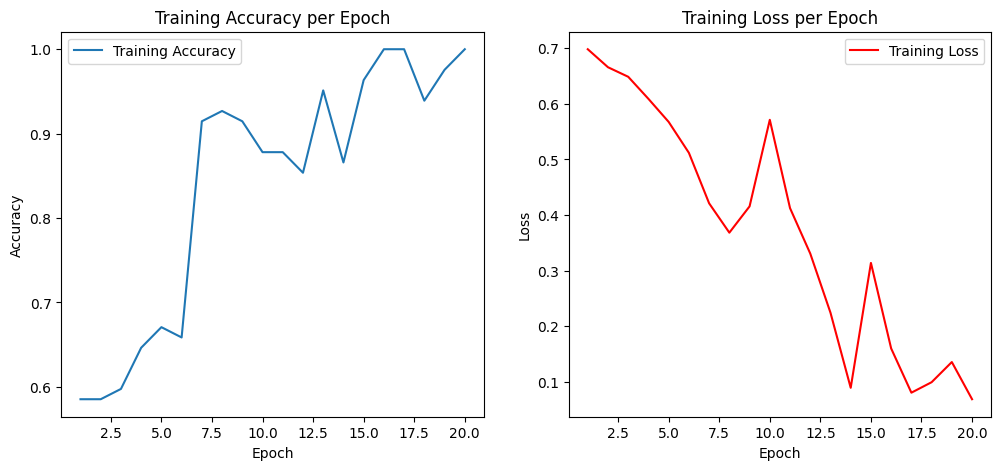

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, Dataset
from torch_geometric.nn import GCNConv, global_mean_pool
import random
import numpy as np
import matplotlib.pyplot as plt

# ランダムシードの設定
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

class CustomGraphDataset(Dataset):
    def __init__(self, num_graphs, num_node_features):
        super(CustomGraphDataset, self).__init__()
        self.num_graphs_internal = num_graphs
        self.num_node_features_internal = num_node_features
        self.graphs = self.generate_graphs()

    def generate_graphs(self):
        graphs = []
        for _ in range(self.num_graphs_internal):
            num_nodes = random.randint(5, 20)
            edge_index = torch.randint(0, num_nodes, (2, num_nodes*2), dtype=torch.long)
            x = torch.randn((num_nodes, self.num_node_features_internal))
            y = torch.tensor([random.randint(0, 1)], dtype=torch.long)
            graphs.append(Data(x=x, edge_index=edge_index, y=y))
        return graphs

    def len(self):
        return len(self.graphs)

    def get(self, idx):
        return self.graphs[idx]

dataset = CustomGraphDataset(num_graphs=82, num_node_features=16)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

class GCNNet(nn.Module):
    def __init__(self):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(16, 32)
        self.conv2 = GCNConv(32, 64)
        self.conv3 = GCNConv(64, 128)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = GCNNet().cuda()

# 交差エントロピー誤差関数
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

record_acc_train = []
record_loss = []

for epoch in range(20):
    net.train()
    running_loss = 0.0
    for data in loader:
        data = data.cuda()
        optimizer.zero_grad()
        out = net(data)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.num_graphs

    net.eval()
    correct = 0
    for data in loader:
        data = data.cuda()
        out = net(data)
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()

    accuracy = correct / len(dataset)
    avg_loss = running_loss / len(dataset)
    record_acc_train.append(accuracy)
    record_loss.append(avg_loss)
    print(f'Epoch {epoch+1}, Accuracy: {accuracy:.4f}, Loss: {avg_loss:.4f}')

# Accuracyの変化をプロット
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), record_acc_train, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

# 損失関数の変化をプロット
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), record_loss, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.show()


GAT

Epoch 1, Accuracy: 0.4146, Loss: 0.7265
Epoch 2, Accuracy: 0.5854, Loss: 0.6953
Epoch 3, Accuracy: 0.5854, Loss: 0.6897
Epoch 4, Accuracy: 0.5854, Loss: 0.6726
Epoch 5, Accuracy: 0.7073, Loss: 0.6735
Epoch 6, Accuracy: 0.7561, Loss: 0.6422
Epoch 7, Accuracy: 0.7317, Loss: 0.6008
Epoch 8, Accuracy: 0.7439, Loss: 0.4746
Epoch 9, Accuracy: 0.8780, Loss: 0.4665
Epoch 10, Accuracy: 0.9268, Loss: 0.2584
Epoch 11, Accuracy: 0.8293, Loss: 0.3212
Epoch 12, Accuracy: 0.8293, Loss: 0.2990
Epoch 13, Accuracy: 0.8537, Loss: 0.5682
Epoch 14, Accuracy: 0.9634, Loss: 0.2641
Epoch 15, Accuracy: 0.9878, Loss: 0.1157
Epoch 16, Accuracy: 0.9634, Loss: 0.0381
Epoch 17, Accuracy: 1.0000, Loss: 0.0177
Epoch 18, Accuracy: 0.9512, Loss: 0.0150
Epoch 19, Accuracy: 0.8780, Loss: 0.2800
Epoch 20, Accuracy: 0.9146, Loss: 0.1839


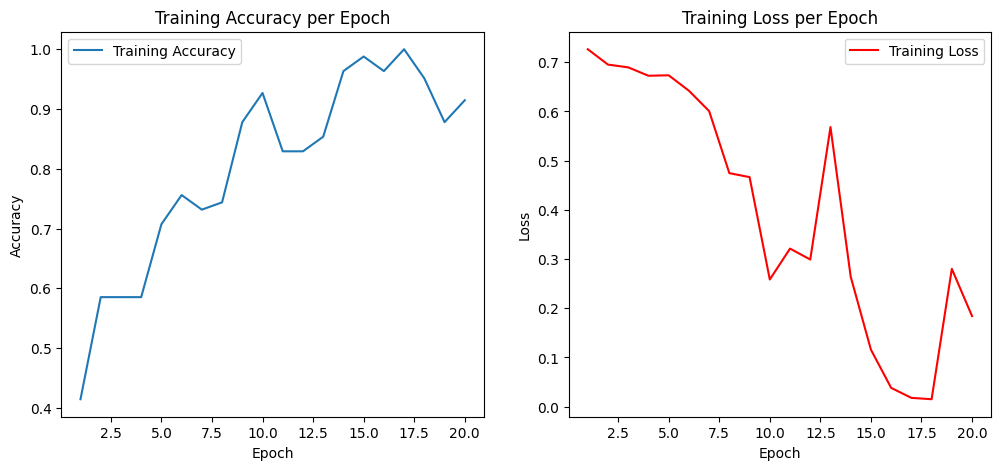

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, Dataset
from torch_geometric.nn import GATConv, global_mean_pool
import random
import numpy as np
import matplotlib.pyplot as plt

# ランダムシードの設定
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

class CustomGraphDataset(Dataset):
    def __init__(self, num_graphs, num_node_features):
        super(CustomGraphDataset, self).__init__()
        self.num_graphs_internal = num_graphs
        self.num_node_features_internal = num_node_features
        self.graphs = self.generate_graphs()

    def generate_graphs(self):
        graphs = []
        for _ in range(self.num_graphs_internal):
            num_nodes = random.randint(5, 20)
            edge_index = torch.randint(0, num_nodes, (2, num_nodes*2), dtype=torch.long)
            x = torch.randn((num_nodes, self.num_node_features_internal))
            y = torch.tensor([random.randint(0, 1)], dtype=torch.long)
            graphs.append(Data(x=x, edge_index=edge_index, y=y))
        return graphs

    def len(self):
        return len(self.graphs)

    def get(self, idx):
        return self.graphs[idx]

dataset = CustomGraphDataset(num_graphs=82, num_node_features=16)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

class GATNet(nn.Module):
    def __init__(self):
        super(GATNet, self).__init__()
        self.conv1 = GATConv(16, 32, heads=4)
        self.conv2 = GATConv(32*4, 64, heads=4)
        self.conv3 = GATConv(64*4, 128, heads=4)
        self.fc1 = nn.Linear(128*4, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = GATNet().cuda()

# 交差エントロピー誤差関数
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

record_acc_train = []
record_loss = []

for epoch in range(20):
    net.train()
    running_loss = 0.0
    for data in loader:
        data = data.cuda()
        optimizer.zero_grad()
        out = net(data)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.num_graphs

    net.eval()
    correct = 0
    for data in loader:
        data = data.cuda()
        out = net(data)
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()

    accuracy = correct / len(dataset)
    avg_loss = running_loss / len(dataset)
    record_acc_train.append(accuracy)
    record_loss.append(avg_loss)
    print(f'Epoch {epoch+1}, Accuracy: {accuracy:.4f}, Loss: {avg_loss:.4f}')

# Accuracyの変化をプロット
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), record_acc_train, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

# 損失関数の変化をプロット
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), record_loss, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.show()


GCNN

Epoch 1, Accuracy: 0.7195, Loss: 0.6952
Epoch 2, Accuracy: 0.7561, Loss: 0.6915
Epoch 3, Accuracy: 0.8049, Loss: 0.6269
Epoch 4, Accuracy: 0.7439, Loss: 0.5030
Epoch 5, Accuracy: 0.8171, Loss: 0.5206
Epoch 6, Accuracy: 0.9268, Loss: 0.4100
Epoch 7, Accuracy: 0.7195, Loss: 0.1868
Epoch 8, Accuracy: 0.9878, Loss: 0.2781
Epoch 9, Accuracy: 0.9390, Loss: 0.3106
Epoch 10, Accuracy: 0.9390, Loss: 0.2734
Epoch 11, Accuracy: 0.9878, Loss: 0.2009
Epoch 12, Accuracy: 0.9878, Loss: 0.0863
Epoch 13, Accuracy: 1.0000, Loss: 0.0644
Epoch 14, Accuracy: 1.0000, Loss: 0.0019
Epoch 15, Accuracy: 1.0000, Loss: 0.0089
Epoch 16, Accuracy: 0.9878, Loss: 0.0003
Epoch 17, Accuracy: 1.0000, Loss: 0.0694
Epoch 18, Accuracy: 0.9512, Loss: 0.0246
Epoch 19, Accuracy: 0.9390, Loss: 0.2202
Epoch 20, Accuracy: 0.9756, Loss: 0.3034


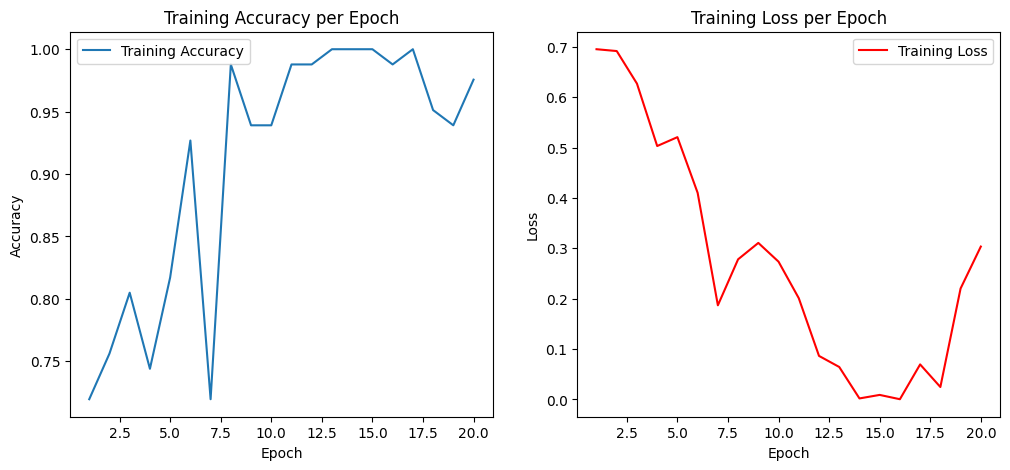

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, Dataset
from torch_geometric.nn import GatedGraphConv, global_mean_pool
import random
import numpy as np
import matplotlib.pyplot as plt

# ランダムシードの設定
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

class CustomGraphDataset(Dataset):
    def __init__(self, num_graphs, num_node_features):
        super(CustomGraphDataset, self).__init__()
        self.num_graphs_internal = num_graphs
        self.num_node_features_internal = num_node_features
        self.graphs = self.generate_graphs()

    def generate_graphs(self):
        graphs = []
        for _ in range(self.num_graphs_internal):
            num_nodes = random.randint(5, 20)
            edge_index = torch.randint(0, num_nodes, (2, num_nodes*2), dtype=torch.long)
            x = torch.randn((num_nodes, self.num_node_features_internal))
            y = torch.tensor([random.randint(0, 1)], dtype=torch.long)
            graphs.append(Data(x=x, edge_index=edge_index, y=y))
        return graphs

    def len(self):
        return len(self.graphs)

    def get(self, idx):
        return self.graphs[idx]

dataset = CustomGraphDataset(num_graphs=82, num_node_features=16)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

class GGNNNet(nn.Module):
    def __init__(self):
        super(GGNNNet, self).__init__()
        self.conv1 = GatedGraphConv(out_channels=32, num_layers=1)
        self.conv2 = GatedGraphConv(out_channels=64, num_layers=1)
        self.conv3 = GatedGraphConv(out_channels=128, num_layers=1)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = GGNNNet().cuda()

# 交差エントロピー誤差関数
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

record_acc_train = []
record_loss = []

for epoch in range(20):
    net.train()
    running_loss = 0.0
    for data in loader:
        data = data.cuda()
        optimizer.zero_grad()
        out = net(data)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.num_graphs

    net.eval()
    correct = 0
    for data in loader:
        data = data.cuda()
        out = net(data)
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()

    accuracy = correct / len(dataset)
    avg_loss = running_loss / len(dataset)
    record_acc_train.append(accuracy)
    record_loss.append(avg_loss)
    print(f'Epoch {epoch+1}, Accuracy: {accuracy:.4f}, Loss: {avg_loss:.4f}')

# Accuracyの変化をプロット
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), record_acc_train, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

# 損失関数の変化をプロット
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), record_loss, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.show()


#### 7.Plot Accuracy


Dataseet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader, Dataset
from torch_geometric.nn import GCNConv, GATConv, GatedGraphConv, global_mean_pool
import random
import numpy as np
import matplotlib.pyplot as plt

# ランダムシードの設定
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

class CustomGraphDataset(Dataset):
    def __init__(self, num_graphs, num_node_features, avg_num_nodes=70):
        super(CustomGraphDataset, self).__init__()
        self.num_graphs_internal = num_graphs
        self.num_node_features_internal = num_node_features
        self.avg_num_nodes = avg_num_nodes
        self.graphs = self.generate_graphs()

    def generate_graphs(self):
        graphs = []
        for _ in range(self.num_graphs_internal):
            num_nodes = int(np.random.normal(self.avg_num_nodes, 10))
            edge_index = torch.randint(0, num_nodes, (2, num_nodes*2), dtype=torch.long)
            x = torch.randn((num_nodes, self.num_node_features_internal))
            y = torch.tensor([random.randint(0, 1)], dtype=torch.long)
            graphs.append(Data(x=x, edge_index=edge_index, y=y))
        return graphs

    def len(self):
        return len(self.graphs)

    def get(self, idx):
        return self.graphs[idx]

dataset = CustomGraphDataset(num_graphs=82, num_node_features=16)
loader = DataLoader(dataset, batch_size=16, shuffle=True)



/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


CONV

In [ ]:
class GCNNet(nn.Module):
    def __init__(self):
        super(GCNNet, self).__init__()
        self.conv1 = GCNConv(16, 32)
        self.conv2 = GCNConv(32, 64)
        self.conv3 = GCNConv(64, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 64)
        self.conv6 = GCNConv(64, 32)
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        x = F.relu(self.conv5(x, edge_index))
        x = F.relu(self.conv6(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

gcn_net = GCNNet().cuda()

optimizer = optim.Adam(gcn_net.parameters(), lr=0.01)


GAT

In [ ]:
class GATNet(nn.Module):
    def __init__(self):
        super(GATNet, self).__init__()
        self.conv1 = GATConv(16, 8, heads=4, concat=True)
        self.conv2 = GATConv(8 * 4, 16, heads=4, concat=True)
        self.conv3 = GATConv(16 * 4, 32, heads=4, concat=True)
        self.conv4 = GATConv(32 * 4, 32, heads=4, concat=True)
        self.conv5 = GATConv(32 * 4, 16, heads=4, concat=True)
        self.conv6 = GATConv(16 * 4, 8, heads=4, concat=True)
        self.fc1 = nn.Linear(8 * 4, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))
        x = F.elu(self.conv4(x, edge_index))
        x = F.elu(self.conv5(x, edge_index))
        x = F.elu(self.conv6(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.elu(self.fc1(x))
        x = self.fc2(x)
        return x

gat_net = GATNet().cuda()

optimizer = optim.Adam(gat_net.parameters(), lr=0.01)



GGNN

In [ ]:
class GGNNNet(nn.Module):
    def __init__(self):
        super(GGNNNet, self).__init__()
        self.conv1 = GatedGraphConv(out_channels=32, num_layers=1)
        self.conv2 = GatedGraphConv(out_channels=64, num_layers=1)
        self.conv3 = GatedGraphConv(out_channels=128, num_layers=1)
        self.conv4 = GatedGraphConv(out_channels=128, num_layers=1)
        self.conv5 = GatedGraphConv(out_channels=64, num_layers=1)
        self.conv6 = GatedGraphConv(out_channels=32, num_layers=1)
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        x = F.relu(self.conv5(x, edge_index))
        x = F.relu(self.conv6(x, edge_index))
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

ggnn_net = GGNNNet().cuda()

optimizer = optim.Adam(ggnn_net.parameters(), lr=0.01)


トレーニングと評価

Epoch 1, Accuracy: 0.5244, Loss: 0.6969
Epoch 2, Accuracy: 0.6463, Loss: 0.6938
Epoch 3, Accuracy: 0.5000, Loss: 0.6920
Epoch 4, Accuracy: 0.6951, Loss: 0.7073
Epoch 5, Accuracy: 0.5244, Loss: 0.6896
Epoch 6, Accuracy: 0.5244, Loss: 0.6917
Epoch 7, Accuracy: 0.5244, Loss: 0.6912
Epoch 8, Accuracy: 0.5244, Loss: 0.6893
Epoch 9, Accuracy: 0.7195, Loss: 0.6821
Epoch 10, Accuracy: 0.6707, Loss: 0.6625
Epoch 11, Accuracy: 0.7073, Loss: 0.6468
Epoch 12, Accuracy: 0.6585, Loss: 0.6101
Epoch 13, Accuracy: 0.7439, Loss: 0.5844
Epoch 14, Accuracy: 0.7805, Loss: 0.4892
Epoch 15, Accuracy: 0.7683, Loss: 0.4495
Epoch 16, Accuracy: 0.8659, Loss: 0.6943
Epoch 17, Accuracy: 0.5244, Loss: 0.6273
Epoch 18, Accuracy: 0.5244, Loss: 0.6883
Epoch 19, Accuracy: 0.5854, Loss: 0.6294
Epoch 20, Accuracy: 0.5122, Loss: 0.5779
Epoch 1, Accuracy: 0.5366, Loss: 0.7253
Epoch 2, Accuracy: 0.7073, Loss: 0.6575
Epoch 3, Accuracy: 0.6707, Loss: 0.6552
Epoch 4, Accuracy: 0.6707, Loss: 0.6494
Epoch 5, Accuracy: 0.8049, Lo

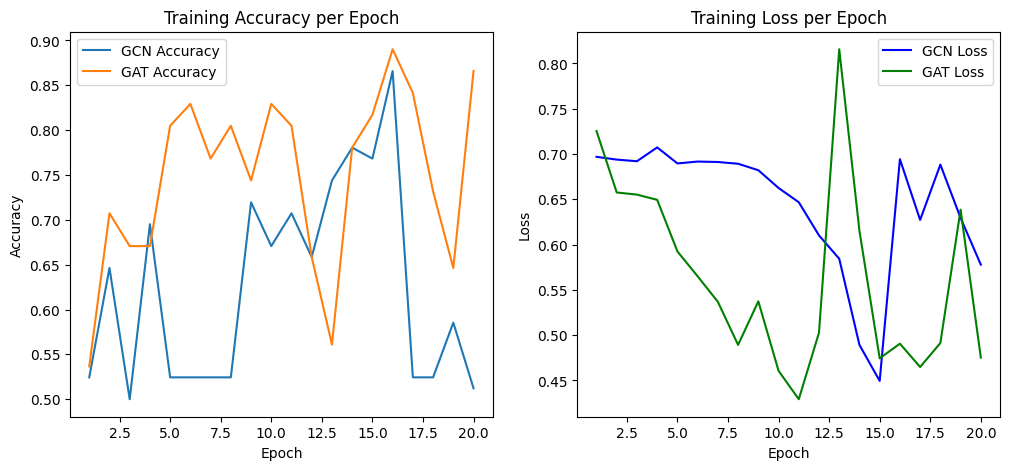

In [ ]:
def train_and_evaluate(model, optimizer, loader, epochs=20):
    loss_fn = nn.CrossEntropyLoss()
    record_acc_train = []
    record_loss = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for data in loader:
            data = data.cuda()
            optimizer.zero_grad()
            out = model(data)
            loss = loss_fn(out, data.y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * data.num_graphs

        model.eval()
        correct = 0
        for data in loader:
            data = data.cuda()
            out = model(data)
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()

        accuracy = correct / len(dataset)
        avg_loss = running_loss / len(dataset)
        record_acc_train.append(accuracy)
        record_loss.append(avg_loss)
        print(f'Epoch {epoch+1}, Accuracy: {accuracy:.4f}, Loss: {avg_loss:.4f}')

    return record_acc_train, record_loss

# モデルとオプティマイザをリセットしてトレーニング
gcn_net = GCNNet().cuda()
optimizer = optim.Adam(gcn_net.parameters(), lr=0.01)
acc_gcn, loss_gcn = train_and_evaluate(gcn_net, optimizer, loader)

gat_net = GATNet().cuda()
optimizer = optim.Adam(gat_net.parameters(), lr=0.01)
acc_gat, loss_gat = train_and_evaluate(gat_net, optimizer, loader)

# ggnn_net = GGNNNet().cuda()
# optimizer = optim.Adam(ggnn_net.parameters(), lr=0.01)
# acc_ggnn, loss_ggnn = train_and_evaluate(ggnn_net, optimizer, loader)

# 精度の変化をプロット
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), acc_gcn, label='GCN Accuracy')
plt.plot(range(1, 21), acc_gat, label='GAT Accuracy')
# plt.plot(range(1, 21), acc_ggnn, label='GGNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

# 損失関数の変化をプロット
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), loss_gcn, label='GCN Loss', color='blue')
plt.plot(range(1, 21), loss_gat, label='GAT Loss', color='green')
# plt.plot(range(1, 21), loss_ggnn, label='GGNN Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.show()


### Save Graph as PDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import networkx as nx
import os

    # nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/degree_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 degree_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.degree_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# betweenness_centrality

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/betweenness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 betweenness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.betweenness_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# closeness_centrality

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/closeness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 closeness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.closeness_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
#  eigenvector_centrality_power

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/eigenvector_centrality_power'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 eigenvector_centrality_power
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.eigenvector_centrality(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, pagerank, 'pagerank')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/pagerank'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 pagerank
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.pagerank(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, eccentricity_centrality, 'eccentricity_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/eccentricity_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 eccentricity_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.eccentricity(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, load_centrality, 'load_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/load_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 load_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.load_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, harmonic_centrality, 'harmonic_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/harmonic_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 harmonic_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.harmonic_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, katz_centrality, 'katz_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/katz_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 katz_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.katz_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, subgraph_centrality, 'subgraph_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/subgraph_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 subgraph_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.subgraph_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, edge_betweenness_centrality, 'edge_betweenness_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/edge_betweenness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 edge_betweenness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.edge_betweenness_centrality(G).values()]
    try:
      nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    except Exception as e:
      nx.draw(G, pos, with_labels=True, node_color='gray', node_size=1, edge_color='k', linewidths=1, font_size=10)
      plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, second_order_centrality, 'second_order_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/second_order_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 second_order_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.second_order_centrality(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# # nx.set_node_attributes(G, bonacich_cent, 'bonacich_centrality')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/bonacich_cent'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 bonacich_cent
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.bonacich_centrality(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# # nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/clustering_coefficient'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 clustering_coefficient
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.clustering_coefficient(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
#     # nx.set_node_attributes(G, local_reaching_centrality, 'local_reaching_centrality')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/flask/cfg_pdf/local_reaching_centrality'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 local_reaching_centrality
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.local_reaching_centrality(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

##3.2Networkx

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Dataframe
# df_flask
df_networkx
# df_pytorch_geometric

############################# In case of Networkx
# df = pd.DataFrame(data)
df = df_networkx

# エッジリストとノードリストのパース関数
def parse_edge_list(edge_list):
    # Split at '->', strip whitespace, and remove semicolons before converting to integers
    # Updated regex to only match lines with the format "number -> number;"
    return [(int(edge.split('->')[0].strip().rstrip(';')), int(edge.split('->')[1].strip().rstrip(';')))
            for edge in edge_list if re.match(r'^\d+\s+->\s+\d+;', edge)]


def parse_node_list(node_list): # Changed input type to list
    result = {}
    for item in node_list:
        # Extract key and value using a regular expression
        match = re.match(r'"(\d+)":\s+(.*)', item)
        if match:
            #check
            print('match??????')
            key = match.group(1)
            value = match.group(2)
            result[key] = value
    return result

# グラフの作成と属性の付与
graphs = []

for index, row in df.iterrows():
    # G = nx.DiGraph()  # 有向グラフを使用する場合
    G = nx.Graph()  # 無向グラフを使用する場合
    edge_list = parse_edge_list(row['EdgeList'])
    # #check
    # print('edge_list : {}'.format(edge_list))

    # エッジリストの追加
    G.add_edges_from(edge_list)

    # # ノードリストの追加と属性の設定
    # node_list = parse_node_list(row['NodeList'])
    # #check
    # print('node_list'.format(node_list))
    # for node, attr in node_list.items():
    #     #check
    #     print('attr : {}'.format(attr))
    #     G.add_node(int(node), label=attr.strip('[]"')) # Strip quotes and brackets from attribute

    # ノードリストの追加と属性の設定
    for node, attr in row['NodeList'].items():
        # #check
        # print('attr {}'.format(attr))
        G.add_node(int(node), attr=attr)

    # グラフレベルの属性としてグラフ名を追加
    G.graph['name'] = row['FileName']

    # グラフレベルの属性としてライブラリ名を追加
    G.graph['library']  = row['LibraryName']

    graphs.append(G)

# # 結果の確認
# for g in graphs:
#     print(f"Graph Name: {g.graph['name']}")
#     print(f"Nodes: {g.nodes(data=True)}")
#     print(f"Edges: {g.edges()}")
#     print()

# グラフを順番に処理
for i, G in enumerate(graphs):
    # file_name = f"{i}.pdf"
    # save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

In [ ]:
import numpy as np
import random
from scipy.sparse import csr_matrix # import csr_matrix
from scipy.sparse.linalg import inv

#Culculated Graphs List
Gs = []

for G in graphs:

    # Degree Centrality
    try:
        degree_centrality = nx.degree_centrality(G)
    except Exception as e:
        print(f"Occrreed an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    #Betweeness Centrality
    try:
        betweenness_centrality = nx.betweenness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    #Closeness Centrality
    try:
        closeness_centrality = nx.closeness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    # Eigen Vector Centrality Power Method
    try:
        eigenvector_centrality_power = nx.eigenvector_centrality_numpy(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Page-Rank
    try:
        pagerank = nx.pagerank(G, max_iter=10000) #PageRank
    except Exception as e:
        print(f"Occurred an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    # Eccentricity CEntrality
    try:
        eccentricity_centrality = nx.eccentricity(G)
    except Exception as e:
        print(f"Occurred an error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Load Centrality
    try:
        load_centrality = nx.load_centrality(G)
    except Exception as e:
        print(f"Occurred an error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Harmonic Centrality
    try:
        harmonic_centrality = nx.harmonic_centrality(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Katz Centrality
    try:
        katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Subgraph Centrality
    try:
        subgraph_centrality = nx.subgraph_centrality(G)
    except Exception as e:
        print(f"Occurred an Eeror : {e}")
        clustering_coefficient = random.randint(1, 10)

    # Edge Betweeness Centrality
    try:
        edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Second Oder Centrality
    try:
        def second_order_centrality(G):
            A = nx.adjacency_matrix(G).todense()
            L = np.diag(np.sum(A, axis=0)) - A
            eigvals, eigvecs = np.linalg.eig(L)
            fiedler_vector = eigvecs[:, np.argsort(eigvals)[1]]  # Fiedler vector
            # Check if fiedler_vector is 1D and adjust indexing accordingly
            if fiedler_vector.ndim == 1:
                centrality = {node: abs(fiedler_vector[i]) for i, node in enumerate(G.nodes())}
            else:
                centrality = {node: abs(fiedler_vector[i, 0]) for i, node in enumerate(G.nodes())}
            return centrality
        # Second-order Centralityの計算
        second_order_centrality = second_order_centrality(G)
    except Exception as e:
      print(f"Occurred an error: {e}")
      clustering_coefficient = random.randint(1, 10)

    ## Bonachichi custom function ##
    try:
        def bonacich_centrality_scipy(G, alpha, beta, normalized=True):
            # グラフの隣接行列をSciPyのCSR形式の疎行列として取得
            A = nx.adjacency_matrix(G)
            n = A.shape[0]
            I = csr_matrix(np.identity(n))  # 単位行列をCSR形式で作成

            # ボナチッチ中心性の計算式 (I - αA)^-1 を計算
            try:
                B = inv(I - alpha * A)
            except Exception as e:
                raise e

            # βを計算
            centrality = beta * B
            centrality_array = centrality.toarray().flatten()

            # 中心性をdict形式で返す
            centrality_dict = {list(G.nodes())[i]: centrality_array[i] for i in range(n)}

            # 正規化が必要な場合は実施
            if normalized:
                max_centrality = max(centrality_dict.values())
                centrality_dict = {k: v / max_centrality for k, v in centrality_dict.items()}

            return centrality_dict
    ## Bonachichi ##
        bonacich_cent = bonacich_centrality_scipy(G, alpha=0.01, beta=1)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        bonacich_cent = random.randint(1, 10)

    # Clustering Coefficient
    try:
        clustering_coefficient = nx.clustering(G)
    except Exception as e:
        print(f"Occurred an Error : (e)")
        clustering_coefficient = random.randint(1, 10)

    # Local Reaching Centrality
    try:
      def local_reaching_centrality(G, node):
          paths = nx.single_source_shortest_path_length(G, node)
          total_reach = sum(paths.values())
          return total_reach / (len(G.nodes()) - 1)
      # Local Reacing Centrality
      local_reaching_centrality = {node: local_reaching_centrality(G, node) for node in G.nodes()}
    except Exception as e:
      print(f"Occurred an Error : (e)")
      clustering_coefficient = random.randint(1, 10)

    # Barycenter Centrality
    try:
        barycenter = nx.barycenter(G)
    except Exception as e:
        print(f"Occurred an Error: (e)")
        clustering_coefficient = random.randint(1, 10)

    # # Random Walk Betweenness Centrality
    # try:
    #   def random_walk_betweenness_centrality(G, num_simulations=1000):
    #       centrality = {node: 0 for node in G.nodes()}
    #       for _ in range(num_simulations):
    #           for node in G.nodes():
    #               current_node = node
    #               while True:
    #                   neighbors = list(G.neighbors(current_node))
    #                   if not neighbors:
    #                       break
    #                   next_node = np.random.choice(neighbors)
    #                   centrality[next_node] += 1
    #                   current_node = next_node
    #       total_walks = num_simulations * len(G.nodes())
    #       centrality = {node: centrality[node] / total_walks for node in centrality}
    #       return centrality
    #   # Random Walk Betweenness centrality
    #   random_walk_betweenness_centrality = random_walk_betweenness_centrality(G)
    #   print("Random Walk Betweenness Centrality:", random_walk_betweenness_centrality)
    # except Exception as e:
    #   print(f'Occurred an Error {e}')
    # finally:
    #   random_walk_betweenness_centrality = 1

    # 中心性指標の表示
    print("degree_centrality: {}".format(degree_centrality))
    print("betweenness_centrality: {}".format(betweenness_centrality))
    print("closeness_centrality: {}".format(closeness_centrality))
    print("eigenvector_centrality_power: {}".format(eigenvector_centrality_power))
    print("pagerank: {}".format(pagerank))
    print("eccentricity_centrality: {}".format(eccentricity_centrality))
    print("load_centrality: {}".format(load_centrality))
    print("harmonic_centrality: {}".format(harmonic_centrality))
    print("katz_centrality: {}".format(katz_centrality))
    print("subgraph_centrality: {}".format(subgraph_centrality))
    print("edge_betweenness_centrality: {}".format(edge_betweenness_centrality))
    print("second_order_centrality: {}".format(second_order_centrality))
    print("bonacich_cent: {}".format(bonacich_cent))
    print("clustering_coefficient: {}".format(clustering_coefficient))
    print("local_reaching_centrality: {}".format(local_reaching_centrality))


    # 計算した中心性の値をノードの属性情報として登録
    nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
    nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
    nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
    nx.set_node_attributes(G, eigenvector_centrality_power, 'eigenvector_centrality')
    nx.set_node_attributes(G, pagerank, 'pagerank')
    nx.set_node_attributes(G, eccentricity_centrality, 'eccentricity_centrality')
    nx.set_node_attributes(G, load_centrality, 'load_centrality')
    nx.set_node_attributes(G, harmonic_centrality, 'harmonic_centrality')
    nx.set_node_attributes(G, katz_centrality, 'katz_centrality')
    nx.set_node_attributes(G, subgraph_centrality, 'subgraph_centrality')
    nx.set_node_attributes(G, edge_betweenness_centrality, 'edge_betweenness_centrality')
    nx.set_node_attributes(G, second_order_centrality, 'second_order_centrality')
    nx.set_node_attributes(G, bonacich_cent, 'bonacich_centrality')
    nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient')
    nx.set_node_attributes(G, local_reaching_centrality, 'local_reaching_centrality')

    #Put each Graph into Gs[].
    Gs.append(G)

Occurred an Error: cannot compute centrality for the null graph
Occurred an error: Graph has no nodes or edges
Occurred an Error : Graph has no nodes or edges
degree_centrality: {}
betweenness_centrality: {}
closeness_centrality: {}
eigenvector_centrality_power: {0: -9.250072716863066e-17, 1: -1.5832442187958116e-16, 2: -2.574292643076375e-16, 3: -3.0432590017655344e-16, 4: -3.6204818579872834e-16, 5: -4.219159165821757e-16, 6: -4.500718542953433e-16, 7: -4.810209015292966e-16, 8: -5.208735709558814e-16, 9: -5.437060154291531e-16, 10: -4.826666488368966e-16, 11: -4.660369972808259e-16, 12: -4.0882128179101754e-16, 13: -3.6431271569858475e-16, 14: -3.733363931386917e-16, 15: -4.035851371026974e-16, 16: -4.491792623028926e-16, 17: -4.538634803573059e-16, 18: -4.3736012678574157e-16, 19: -3.8959364973569143e-16, 20: -2.968921750370041e-16, 21: -2.5250729423008786e-16, 43: -1.465255973378044e-16, 22: 0.004474310501774184, 24: 0.012050789681677077, 39: 0.03079656722000206, 23: 0.01143438793

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Occurred an Error: (e)
degree_centrality: {0: 0.012345679012345678, 1: 0.024691358024691357, 81: 0.012345679012345678, 2: 0.024691358024691357, 4: 0.024691358024691357, 77: 0.07407407407407407, 3: 0.037037037037037035, 78: 0.037037037037037035, 7: 0.037037037037037035, 8: 0.037037037037037035, 5: 0.024691358024691357, 6: 0.037037037037037035, 9: 0.024691358024691357, 37: 0.024691358024691357, 38: 0.037037037037037035, 10: 0.037037037037037035, 11: 0.037037037037037035, 36: 0.024691358024691357, 12: 0.024691358024691357, 14: 0.024691358024691357, 13: 0.024691358024691357, 15: 0.037037037037037035, 16: 0.024691358024691357, 17: 0.06172839506172839, 18: 0.024691358024691357, 20: 0.024691358024691357, 35: 0.024691358024691357, 19: 0.037037037037037035, 21: 0.037037037037037035, 22: 0.024691358024691357, 32: 0.024691358024691357, 23: 0.024691358024691357, 24: 0.024691358024691357, 25: 0.06172839506172839, 26: 0.024691358024691357, 34: 0.037037037037037035, 31: 0.024691358024691357, 27: 0.03

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


ストリーミング出力は最後の 5000 行に切り捨てられました。
bonacich_cent: {0: 1.0, 1: 0.01000100010001, 43: 0.00010001000100009999, 2: 0.0, 4: 0.0, 42: 0.0, 3: 0.0, 24: 0.0, 5: 0.0, 7: 0.0, 31: 0.0, 35: 0.0, 40: 0.0, 41: 0.0, 6: 0.0, 29: 0.0, 33: 0.0, 38: 0.0, 23: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 18: 0.0, 17: 0.0, 16: 0.0, 15: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 25: 0.0, 36: 0.0, 26: 0.0, 32: 0.0, 27: 0.0, 28: 0.0, 30: 0.0, 34: 0.0, 37: 0.0, 39: 0.0}
clustering_coefficient: 8
local_reaching_centrality: {0: 0.06976744186046512, 1: 0.046511627906976744, 43: 0.06976744186046512, 2: 6.395348837209302, 4: 5.488372093023256, 42: 3.6744186046511627, 3: 4.5813953488372094, 24: 4.627906976744186, 5: 3.953488372093023, 7: 4.348837209302325, 31: 4.255813953488372, 35: 4.232558139534884, 40: 4.27906976744186, 41: 4.27906976744186, 6: 3.372093023255814, 29: 3.697674418604651, 33: 3.604651162790698, 38: 3.5813953488372094, 23: 3.6744186046511627, 8: 4.744186046511628, 9: 5.093023255813954

In [ ]:
#check
for index, value in enumerate(Gs, start=1):
  print('{} : {}'.format(index, value))

1 : Graph named 'conftest.dot' with 0 nodes and 0 edges
2 : Graph named 'exception.dot' with 4 nodes and 3 edges
3 : Graph named 'relabel.dot' with 82 nodes and 99 edges
4 : Graph named 'convert.dot' with 115 nodes and 141 edges
5 : Graph named '__init__.dot' with 4 nodes and 3 edges
6 : Graph named 'convert_matrix.dot' with 227 nodes and 268 edges
7 : Graph named 'lazy_imports.dot' with 38 nodes and 41 edges
8 : Graph named 'nx_latex.dot' with 87 nodes and 105 edges
9 : Graph named 'layout.dot' with 376 nodes and 448 edges
10 : Graph named 'nx_pydot.dot' with 0 nodes and 0 edges
11 : Graph named 'nx_agraph.dot' with 0 nodes and 0 edges
12 : Graph named '__init__.dot' with 2 nodes and 1 edges
13 : Graph named 'nx_pylab.dot' with 0 nodes and 0 edges
14 : Graph named 'test_agraph.dot' with 4 nodes and 3 edges
15 : Graph named 'test_latex.dot' with 71 nodes and 64 edges
16 : Graph named '__init__.dot' with 2 nodes and 1 edges
17 : Graph named 'test_pydot.dot' with 40 nodes and 36 edges
18

Save Graph as PDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import networkx as nx
import os

    # nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/degree_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 degree_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.degree_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# betweenness_centrality

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/betweenness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 degree_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.betweenness_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# closeness_centrality

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/closeness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 closeness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.closeness_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
#  eigenvector_centrality_power

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/eigenvector_centrality_power'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 eigenvector_centrality_power
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.eigenvector_centrality(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, pagerank, 'pagerank')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/pagerank'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 pagerank
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.pagerank(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, eccentricity_centrality, 'eccentricity_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/eccentricity_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 eccentricity_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.eccentricity(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, load_centrality, 'load_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/load_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 load_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.load_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, harmonic_centrality, 'harmonic_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/harmonic_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 harmonic_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.harmonic_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, katz_centrality, 'katz_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/katz_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 katz_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.katz_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, subgraph_centrality, 'subgraph_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/subgraph_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 subgraph_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.subgraph_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, edge_betweenness_centrality, 'edge_betweenness_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/edge_betweenness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 edge_betweenness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.edge_betweenness_centrality(G).values()]
    try:
      nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    except Exception as e:
      nx.draw(G, pos, with_labels=True, node_color='gray', node_size=1, edge_color='k', linewidths=1, font_size=10)
      plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, second_order_centrality, 'second_order_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/second_order_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 second_order_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.second_order_centrality(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# # nx.set_node_attributes(G, bonacich_cent, 'bonacich_centrality')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/bonacich_cent'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 bonacich_cent
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.bonacich_centrality(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# # nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/clustering_coefficient'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 clustering_coefficient
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.clustering_coefficient(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
#     # nx.set_node_attributes(G, local_reaching_centrality, 'local_reaching_centrality')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/networkx/cfg_pdf/local_reaching_centrality'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 local_reaching_centrality
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.local_reaching_centrality(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

##3.3.pytorch_geomerics

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Dataframe
# df_flask
# df_networkx
df_pytorch_geometric

############################# In case of Pytorch_geometric
# df = pd.DataFrame(data)
df = df_pytorch_geometric

# エッジリストとノードリストのパース関数
def parse_edge_list(edge_list):
    # Split at '->', strip whitespace, and remove semicolons before converting to integers
    # Updated regex to only match lines with the format "number -> number;"
    return [(int(edge.split('->')[0].strip().rstrip(';')), int(edge.split('->')[1].strip().rstrip(';')))
            for edge in edge_list if re.match(r'^\d+\s+->\s+\d+;', edge)]


def parse_node_list(node_list): # Changed input type to list
    result = {}
    for item in node_list:
        # Extract key and value using a regular expression
        match = re.match(r'"(\d+)":\s+(.*)', item)
        if match:
            #check
            print('match??????')
            key = match.group(1)
            value = match.group(2)
            result[key] = value
    return result

# グラフの作成と属性の付与
graphs = []

for index, row in df.iterrows():
    # G = nx.DiGraph()  # 有向グラフを使用する場合
    G = nx.Graph()  # 有向グラフを使用する場合
    edge_list = parse_edge_list(row['EdgeList'])
    # #check
    # print('edge_list : {}'.format(edge_list))

    # エッジリストの追加
    G.add_edges_from(edge_list)

    # # ノードリストの追加と属性の設定
    # node_list = parse_node_list(row['NodeList'])
    # #check
    # print('node_list'.format(node_list))
    # for node, attr in node_list.items():
    #     #check
    #     print('attr : {}'.format(attr))
    #     G.add_node(int(node), label=attr.strip('[]"')) # Strip quotes and brackets from attribute

    # ノードリストの追加と属性の設定
    for node, attr in row['NodeList'].items():
        # #check
        # print('attr {}'.format(attr))
        G.add_node(int(node), attr=attr)

    # グラフレベルの属性としてグラフ名を追加
    G.graph['name'] = row['FileName']

    # グラフレベルの属性としてライブラリ名を追加
    G.graph['library']  = row['LibraryName']

    graphs.append(G)

# # 結果の確認
# for g in graphs:
#     print(f"Graph Name: {g.graph['name']}")
#     print(f"Nodes: {g.nodes(data=True)}")
#     print(f"Edges: {g.edges()}")
#     print()

# グラフを順番に処理
for i, G in enumerate(graphs):
    # file_name = f"{i}.pdf"
    # save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

In [ ]:
import numpy as np
import random
from scipy.sparse import csr_matrix # import csr_matrix
from scipy.sparse.linalg import inv

#Culculated Graphs List
Gs = []

for G in graphs:

    # Degree Centrality
    try:
        degree_centrality = nx.degree_centrality(G)
    except Exception as e:
        print(f"Occrreed an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    #Betweeness Centrality
    try:
        betweenness_centrality = nx.betweenness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    #Closeness Centrality
    try:
        closeness_centrality = nx.closeness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    # Eigen Vector Centrality Power Method
    try:
        eigenvector_centrality_power = nx.eigenvector_centrality_numpy(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Page-Rank
    try:
        pagerank = nx.pagerank(G, max_iter=10000) #PageRank
    except Exception as e:
        print(f"Occurred an Error : {e}")
        clustering_coefficient = random.randint(1, 10)

    # Eccentricity CEntrality
    try:
        eccentricity_centrality = nx.eccentricity(G)
    except Exception as e:
        print(f"Occurred an error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Load Centrality
    try:
        load_centrality = nx.load_centrality(G)
    except Exception as e:
        print(f"Occurred an error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Harmonic Centrality
    try:
        harmonic_centrality = nx.harmonic_centrality(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Katz Centrality
    try:
        katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Subgraph Centrality
    try:
        subgraph_centrality = nx.subgraph_centrality(G)
    except Exception as e:
        print(f"Occurred an Eeror : {e}")
        clustering_coefficient = random.randint(1, 10)

    # Edge Betweeness Centrality
    try:
        edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
    except Exception as e:
        print(f"Occurred an Error: {e}")
        clustering_coefficient = random.randint(1, 10)

    # Second Oder Centrality
    try:
        def second_order_centrality(G):
            A = nx.adjacency_matrix(G).todense()
            L = np.diag(np.sum(A, axis=0)) - A
            eigvals, eigvecs = np.linalg.eig(L)
            fiedler_vector = eigvecs[:, np.argsort(eigvals)[1]]  # Fiedler vector
            # Check if fiedler_vector is 1D and adjust indexing accordingly
            if fiedler_vector.ndim == 1:
                centrality = {node: abs(fiedler_vector[i]) for i, node in enumerate(G.nodes())}
            else:
                centrality = {node: abs(fiedler_vector[i, 0]) for i, node in enumerate(G.nodes())}
            return centrality
        # Second-order Centralityの計算
        second_order_centrality = second_order_centrality(G)
    except Exception as e:
      print(f"Occurred an error: {e}")
      clustering_coefficient = random.randint(1, 10)

    ## Bonachichi custom function ##
    try:
        def bonacich_centrality_scipy(G, alpha, beta, normalized=True):
            # グラフの隣接行列をSciPyのCSR形式の疎行列として取得
            A = nx.adjacency_matrix(G)
            n = A.shape[0]
            I = csr_matrix(np.identity(n))  # 単位行列をCSR形式で作成

            # ボナチッチ中心性の計算式 (I - αA)^-1 を計算
            try:
                B = inv(I - alpha * A)
            except Exception as e:
                raise e

            # βを計算
            centrality = beta * B
            centrality_array = centrality.toarray().flatten()

            # 中心性をdict形式で返す
            centrality_dict = {list(G.nodes())[i]: centrality_array[i] for i in range(n)}

            # 正規化が必要な場合は実施
            if normalized:
                max_centrality = max(centrality_dict.values())
                centrality_dict = {k: v / max_centrality for k, v in centrality_dict.items()}

            return centrality_dict
    ## Bonachichi ##
        bonacich_cent = bonacich_centrality_scipy(G, alpha=0.01, beta=1)
    except Exception as e:
        print(f"Occurred an Error : {e}")
        bonacich_cent = random.randint(1, 10)

    # Clustering Coefficient
    try:
        clustering_coefficient = nx.clustering(G)
    except Exception as e:
        print(f"Occurred an Error : (e)")
        clustering_coefficient = random.randint(1, 10)

    # Local Reaching Centrality
    try:
      def local_reaching_centrality(G, node):
          paths = nx.single_source_shortest_path_length(G, node)
          total_reach = sum(paths.values())
          return total_reach / (len(G.nodes()) - 1)
      # Local Reacing Centrality
      local_reaching_centrality = {node: local_reaching_centrality(G, node) for node in G.nodes()}
    except Exception as e:
      print(f"Occurred an Error : (e)")
      clustering_coefficient = random.randint(1, 10)

    # Barycenter Centrality
    try:
        barycenter = nx.barycenter(G)
    except Exception as e:
        print(f"Occurred an Error: (e)")
        clustering_coefficient = random.randint(1, 10)

    # # Random Walk Betweenness Centrality
    # try:
    #   def random_walk_betweenness_centrality(G, num_simulations=1000):
    #       centrality = {node: 0 for node in G.nodes()}
    #       for _ in range(num_simulations):
    #           for node in G.nodes():
    #               current_node = node
    #               while True:
    #                   neighbors = list(G.neighbors(current_node))
    #                   if not neighbors:
    #                       break
    #                   next_node = np.random.choice(neighbors)
    #                   centrality[next_node] += 1
    #                   current_node = next_node
    #       total_walks = num_simulations * len(G.nodes())
    #       centrality = {node: centrality[node] / total_walks for node in centrality}
    #       return centrality
    #   # Random Walk Betweenness centrality
    #   random_walk_betweenness_centrality = random_walk_betweenness_centrality(G)
    #   print("Random Walk Betweenness Centrality:", random_walk_betweenness_centrality)
    # except Exception as e:
    #   print(f'Occurred an Error {e}')
    # finally:
    #   random_walk_betweenness_centrality = 1

    # 中心性指標の表示
    print("degree_centrality: {}".format(degree_centrality))
    print("betweenness_centrality: {}".format(betweenness_centrality))
    print("closeness_centrality: {}".format(closeness_centrality))
    print("eigenvector_centrality_power: {}".format(eigenvector_centrality_power))
    print("pagerank: {}".format(pagerank))
    print("eccentricity_centrality: {}".format(eccentricity_centrality))
    print("load_centrality: {}".format(load_centrality))
    print("harmonic_centrality: {}".format(harmonic_centrality))
    print("katz_centrality: {}".format(katz_centrality))
    print("subgraph_centrality: {}".format(subgraph_centrality))
    print("edge_betweenness_centrality: {}".format(edge_betweenness_centrality))
    print("second_order_centrality: {}".format(second_order_centrality))
    print("bonacich_cent: {}".format(bonacich_cent))
    print("clustering_coefficient: {}".format(clustering_coefficient))
    print("local_reaching_centrality: {}".format(local_reaching_centrality))


    # 計算した中心性の値をノードの属性情報として登録
    nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
    nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
    nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
    nx.set_node_attributes(G, eigenvector_centrality_power, 'eigenvector_centrality')
    nx.set_node_attributes(G, pagerank, 'pagerank')
    nx.set_node_attributes(G, eccentricity_centrality, 'eccentricity_centrality')
    nx.set_node_attributes(G, load_centrality, 'load_centrality')
    nx.set_node_attributes(G, harmonic_centrality, 'harmonic_centrality')
    nx.set_node_attributes(G, katz_centrality, 'katz_centrality')
    nx.set_node_attributes(G, subgraph_centrality, 'subgraph_centrality')
    nx.set_node_attributes(G, edge_betweenness_centrality, 'edge_betweenness_centrality')
    nx.set_node_attributes(G, second_order_centrality, 'second_order_centrality')
    nx.set_node_attributes(G, bonacich_cent, 'bonacich_centrality')
    nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient')
    nx.set_node_attributes(G, local_reaching_centrality, 'local_reaching_centrality')

    #Put each Graph into Gs[].
    Gs.append(G)

In [ ]:
#check
for index, value in enumerate(Gs, start=1):
  print('{} : {}'.format(index, value))

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

import matplotlib.pyplot as plt
import networkx as nx
import os

    # nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/degree_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 degree_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.degree_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# betweenness_centrality

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/betweenness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 degree_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.betweenness_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# closeness_centrality

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/closeness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 closeness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.closeness_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
#  eigenvector_centrality_power

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/eigenvector_centrality_power'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 eigenvector_centrality_power
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.eigenvector_centrality(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, pagerank, 'pagerank')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/pagerank'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 pagerank
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.pagerank(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, eccentricity_centrality, 'eccentricity_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/eccentricity_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 eccentricity_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()


    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.eccentricity(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, load_centrality, 'load_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/load_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 load_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.load_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, harmonic_centrality, 'harmonic_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/harmonic_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 harmonic_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.harmonic_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, katz_centrality, 'katz_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/katz_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 katz_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.katz_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, subgraph_centrality, 'subgraph_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/subgraph_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 subgraph_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.subgraph_centrality(G).values()]
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, edge_betweenness_centrality, 'edge_betweenness_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/edge_betweenness_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 edge_betweenness_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    node_sizes = [v * 1000 for v in nx.edge_betweenness_centrality(G).values()]
    try:
      nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    except Exception as e:
      nx.draw(G, pos, with_labels=True, node_color='gray', node_size=1, edge_color='k', linewidths=1, font_size=10)
      plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# nx.set_node_attributes(G, second_order_centrality, 'second_order_centrality')

# 保存先のディレクトリパス
save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/second_order_centrality'

# 保存先のディレクトリが存在しない場合は作成
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# グラフを順番に処理 second_order_centrality
for i, G in enumerate(Gs):
    file_name = f"{i}.pdf"
    save_path = os.path.join(save_directory, file_name)

    # グラフの描画
    pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # # 度中心性に基づいてノードのサイズを決定する
    try:
      node_sizes = [v * 1000 for v in nx.second_order_centrality(G).values()]
    except Exception as e:
      node_sizes = 1
    nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
    plt.show()

    # PDFとして保存
    plt.savefig(save_path)
    plt.close()  # 現在の図を閉じて新しい図の描画をクリア

    print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# # nx.set_node_attributes(G, bonacich_cent, 'bonacich_centrality')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/bonacich_cent'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 bonacich_cent
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.bonacich_centrality(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
# # nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/clustering_coefficient'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 clustering_coefficient
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.clustering_coefficient(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

In [ ]:
#     # nx.set_node_attributes(G, local_reaching_centrality, 'local_reaching_centrality')

# # 保存先のディレクトリパス
# save_directory = '/content/drive/MyDrive/ColabNotebooks/SES2024/python_dot/pytorch_geometric/cfg_pdf/local_reaching_centrality'

# # 保存先のディレクトリが存在しない場合は作成
# if not os.path.exists(save_directory):
#     os.makedirs(save_directory)

# # グラフを順番に処理 local_reaching_centrality
# for i, G in enumerate(Gs):
#     file_name = f"{i}.pdf"
#     save_path = os.path.join(save_directory, file_name)

#     # グラフの描画
#     pos = nx.spring_layout(G)  # ノードの位置を決定するためにspring_layoutを使用
#     plt.figure(figsize=(8, 6))
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=700, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # # 度中心性に基づいてノードのサイズを決定する
#     node_sizes = [v * 1000 for v in nx.local_reaching_centrality(G).values()]
#     nx.draw(G, pos, with_labels=True, node_color='gray', node_size=node_sizes, edge_color='k', linewidths=1, font_size=10)
#     plt.show()

#     # PDFとして保存
#     plt.savefig(save_path)
#     plt.close()  # 現在の図を閉じて新しい図の描画をクリア

#     print(f"{i+1}番目のグラフが '{save_path}' に保存されました。")

----------------
